# Impact of Feature Scaling in Machine Learning Algorithms

This document serves as the Supplementary Material for the article Impact of Feature Scaling in Machine Learning Algorithms. Because the final results comprise over 50 tables, we have consolidated them here for clarity and ease of reference. You will find the complete outcomes for each dataset—detailing the scaling methods applied, the machine learning algorithms evaluated, performance metrics, and both training and inference times. All analyses were performed using Python, and the raw CSV files are available in the repository for convenient spreadsheet–based review.

## Loading the data and libraries

In [1]:
import pandas as pd
import dataframe_image as dfi
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import re

df_results = pd.read_csv('results_final.csv')
df_results['scaling_name'] = df_results['scaling_name'].fillna('None')

In [2]:
import re
def format_dataset_name(name):
    # Remove suffix like "_dataset"
    name = re.sub(r'_dataset$', '', name)
    # Replace underscores with spaces
    name = name.replace('_', ' ')
    # Capitalize each word
    return name.title()
dataset_names = df_results['dataset_name'].unique()
formatted_names = [format_dataset_name(name) for name in dataset_names]
dataset_names = df_results['dataset_name'].unique()
formatted_names = [format_dataset_name(name) for name in dataset_names]
name_mapping = dict(zip(dataset_names, formatted_names))

Here’s a clear mapping of scaling abbreviations to their full names, optimized for plots/tables:

In [3]:
scaling_abbrev = {
    'MinMaxScaler': 'MM',
    'MaxAbsScaler': 'MA',
    'StandardScaler': 'SS',
    'ParetoScaling': 'PS',
    'StandardStabilityScaling': 'SSS',
    'MeanCentered': 'MC',
    'None': 'NO',
    'RobustScaler': 'RS',
    'QuantileTransformer': 'QT',
    'DecimalScaling': 'DS',
    'TanhTransformer': 'TT',
    'LogisticSigmoidTransformer': 'LS',
    'HyperbolicTangentTransformer': 'HT'
}

In [4]:
# mapping the abbreviations
df_results['scaling_abbrev'] = df_results['scaling_name'].replace(scaling_abbrev)

## Classifications Results

### Accuracy results for in each dataset for each model and scaling

#### Tables and plots of accuracy results

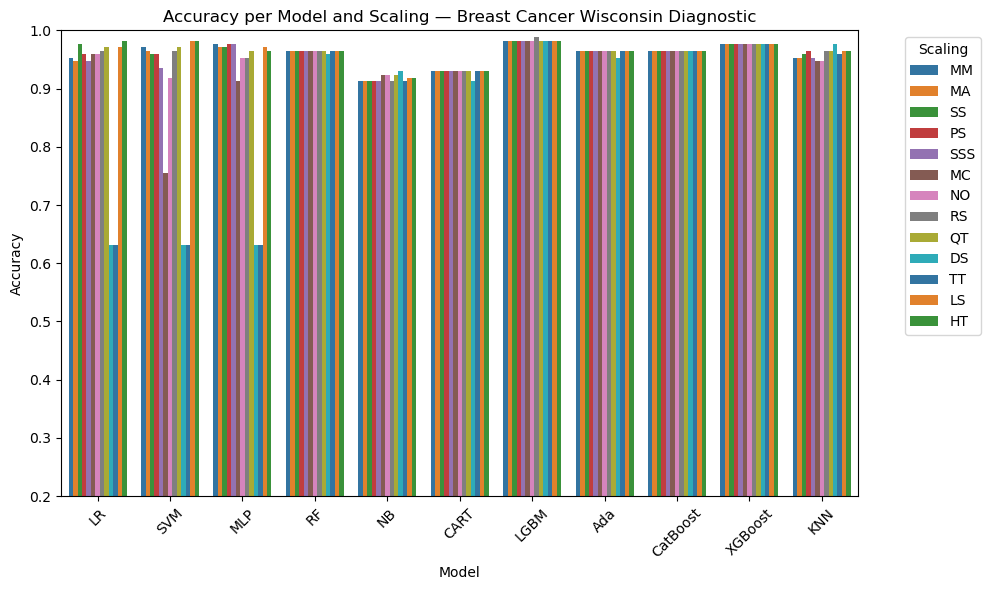

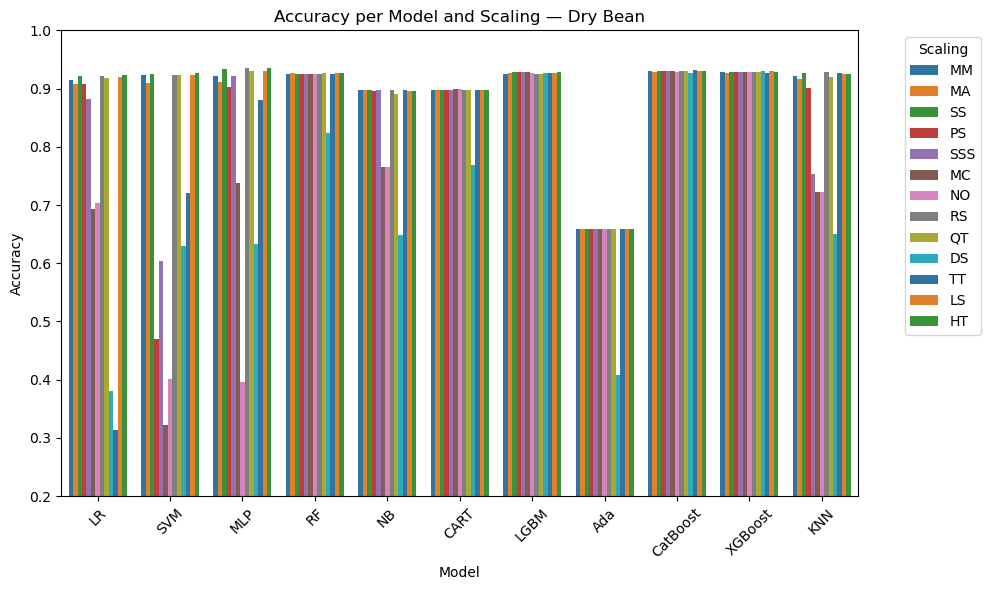

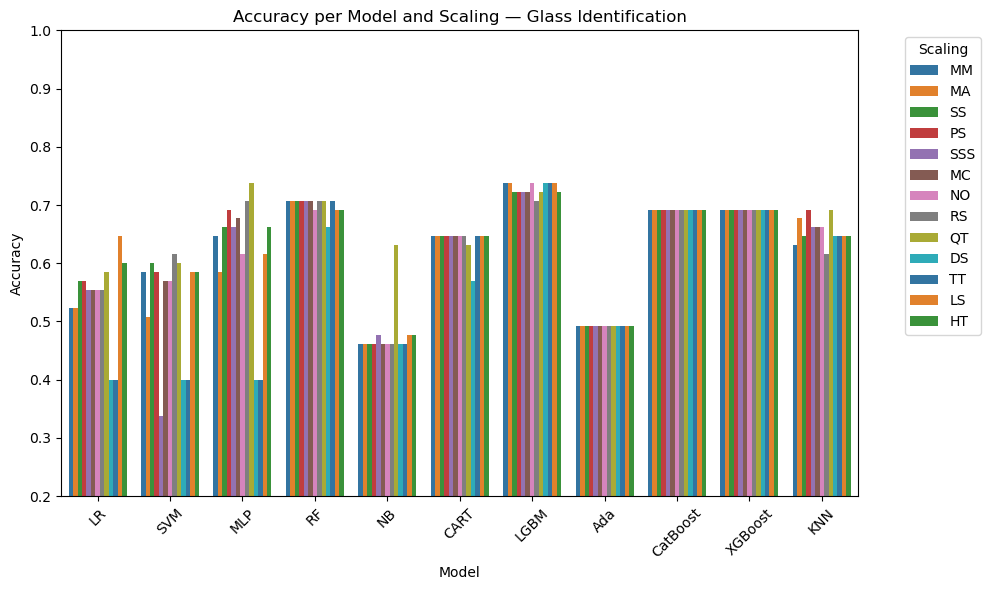

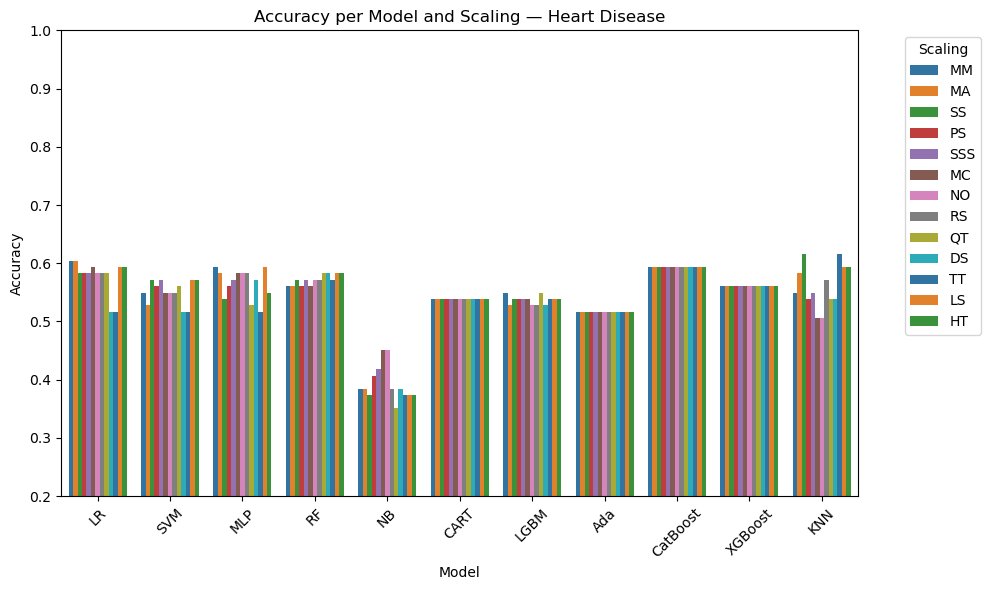

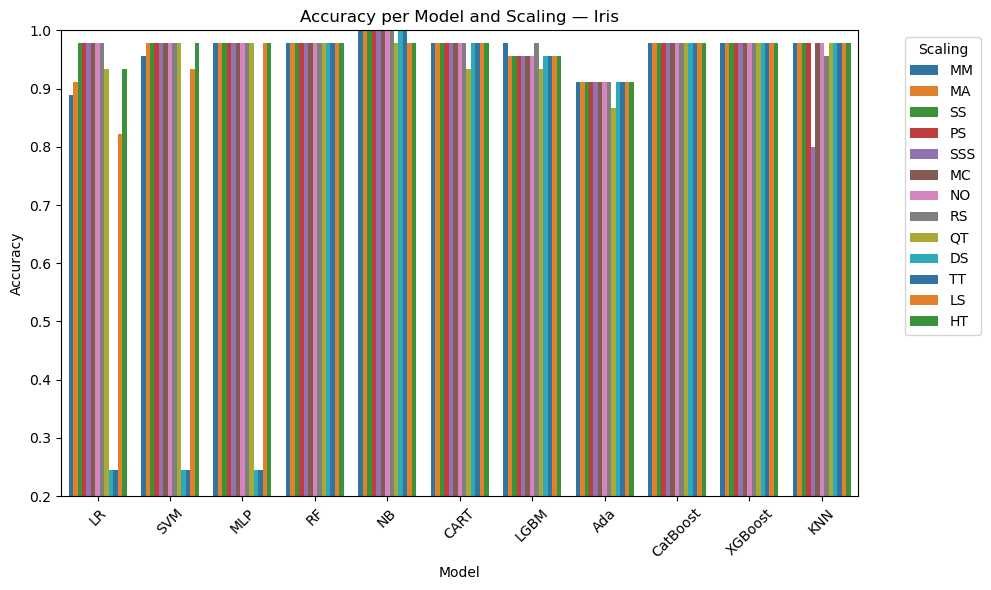

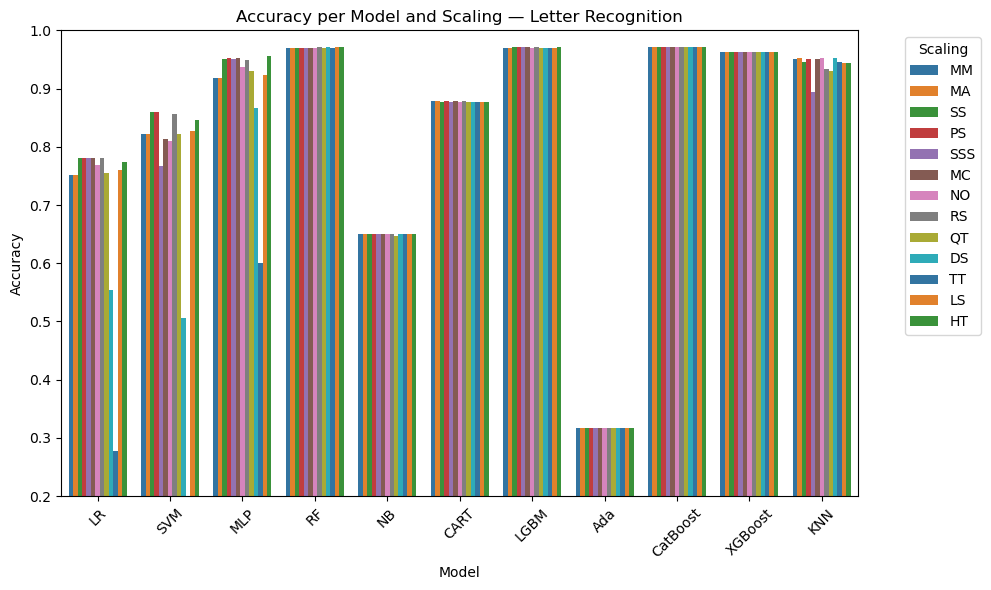

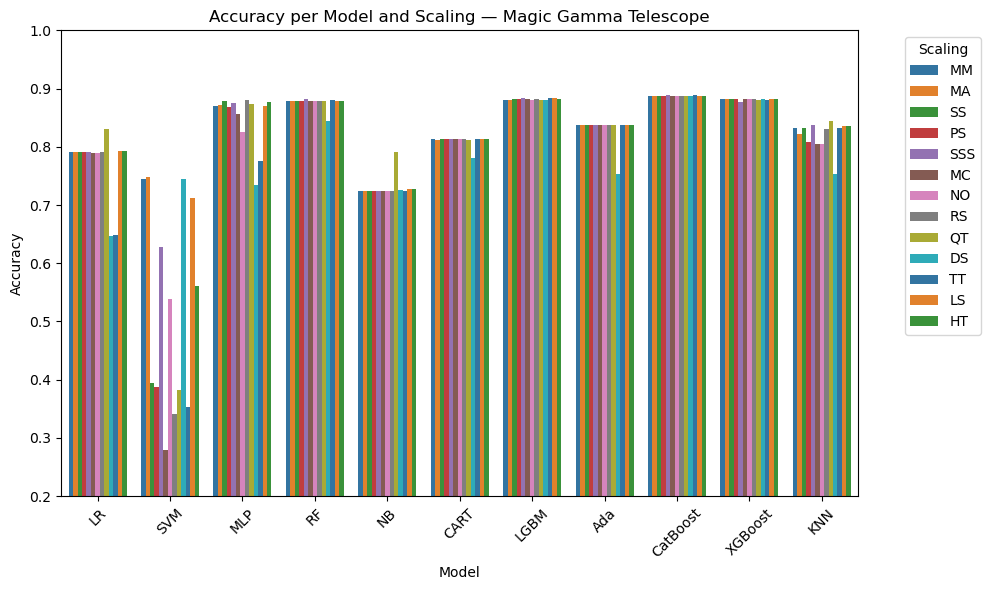

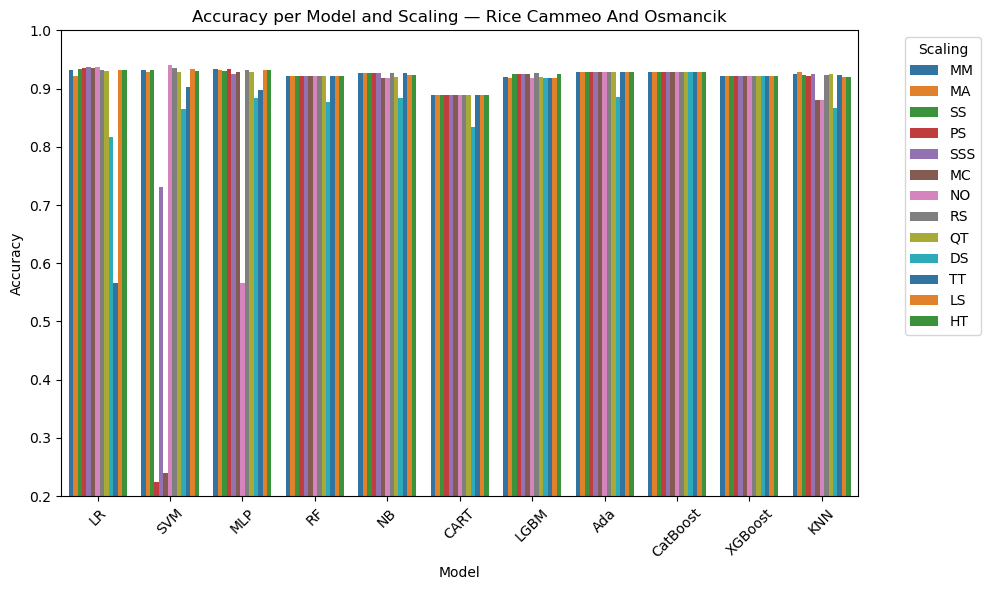

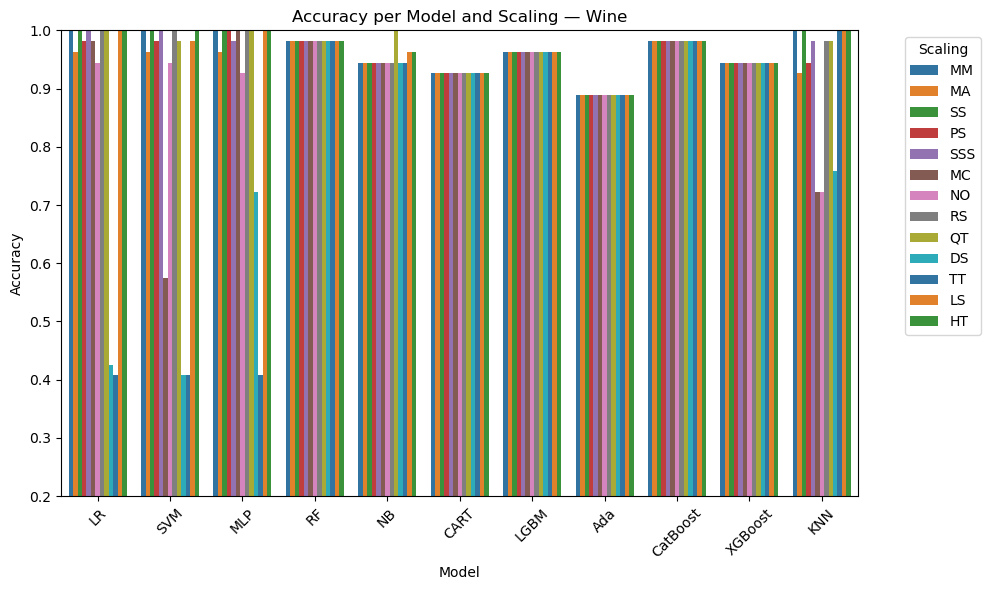

In [5]:
# Create output directory
output_dir = "results/figures_accuracy_scaling"
os.makedirs(output_dir, exist_ok=True)

# List of datasets to process
datasets = df_results['dataset_name'].loc[df_results['accuracy'].notna()].unique()

for dataset in datasets:
    df_filtered = df_results[df_results['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_filtered,
        x='model',
        y='accuracy',
        hue='scaling_abbrev',
        palette='tab10'
    )
    plt.title(f"Accuracy per Model and Scaling — {nice_title}")
    plt.ylim(0.2, 1.0)
    plt.xticks(rotation=45)
    plt.ylabel("Accuracy")
    plt.xlabel("Model")
    plt.legend(title="Scaling", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Save figure
    plt.savefig(f"{output_dir}/{dataset}_accuracy.pdf")
    plt.show()
    plt.close()


### Time to train and time do inference in classifications results

#### Tables and plot time to train

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Create output directory
output_dir = "results/tables_time_train_classification"
os.makedirs(output_dir, exist_ok=True)
df_class_analysis = df_results['dataset_name'].loc[df_results['accuracy'].notna()].unique()

def bold_max_mask(df):
    return df.eq(df.max(axis=1), axis=0)

for dataset in df_class_analysis:
    df_filtered_class = df_results[df_results['dataset_name'] == dataset]
    heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['time_train'].mean().unstack()
    heat_df = heat_df.round(4)

    bold_mask = bold_max_mask(heat_df)

    fig, ax = plt.subplots(figsize=(12, 0.5 * len(heat_df) + 2))
    ax.axis('off')
    # ax.set_title(
    #     f"Experimental Results for '{dataset}' Dataset\nMean time_train by Model and Scaling Method",
    #     fontsize=14, weight='bold'
    # )

    table = ax.table(
        cellText=heat_df.values,
        rowLabels=heat_df.index,
        colLabels=heat_df.columns,
        loc='center',
        cellLoc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    # Bold max values
    for i, row in enumerate(bold_mask.values):
        for j, is_bold in enumerate(row):
            if is_bold:
                cell = table[(i + 1, j)]
                cell.set_fontsize(10)
                cell.set_text_props(weight='bold')

    # Save one PDF per dataset
    plt.savefig(f"{output_dir}/{dataset}_table_time_train.pdf", bbox_inches='tight')
    plt.close(fig)


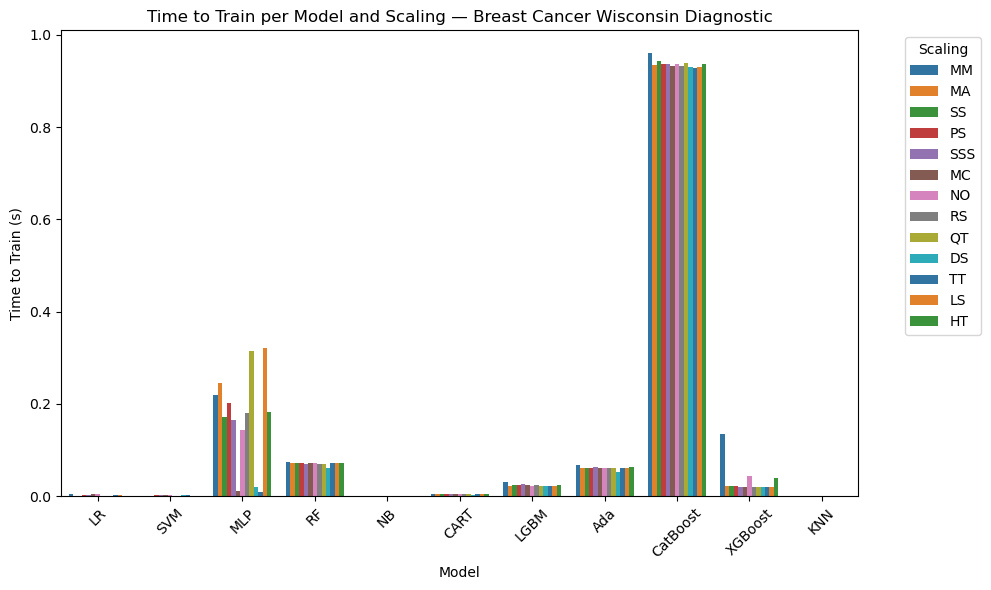

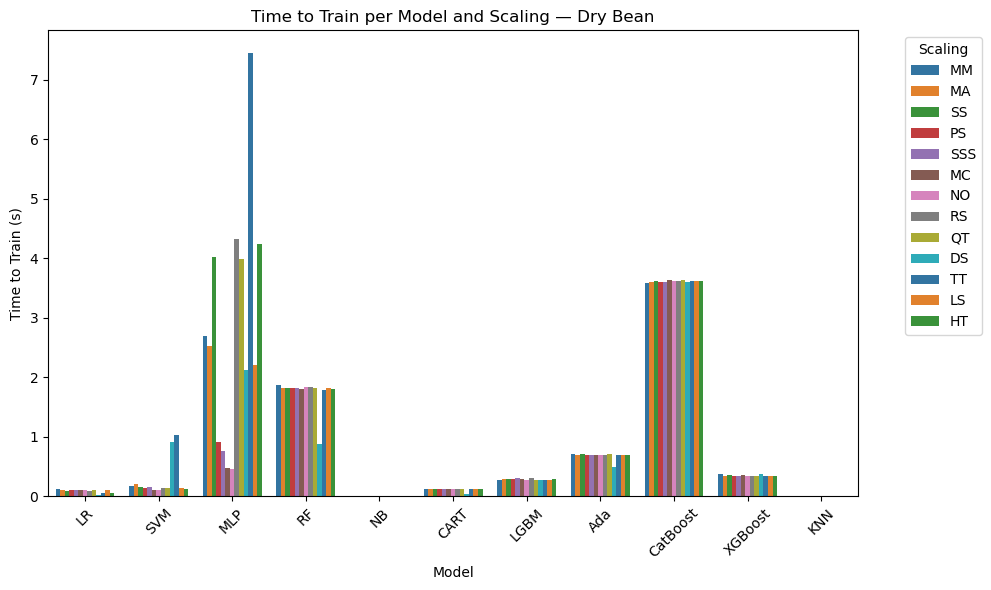

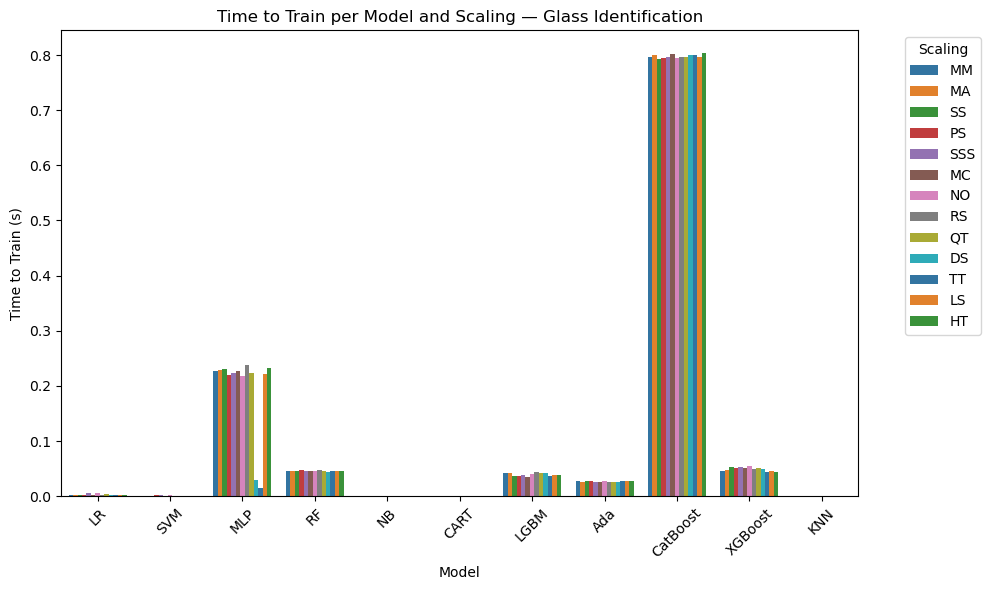

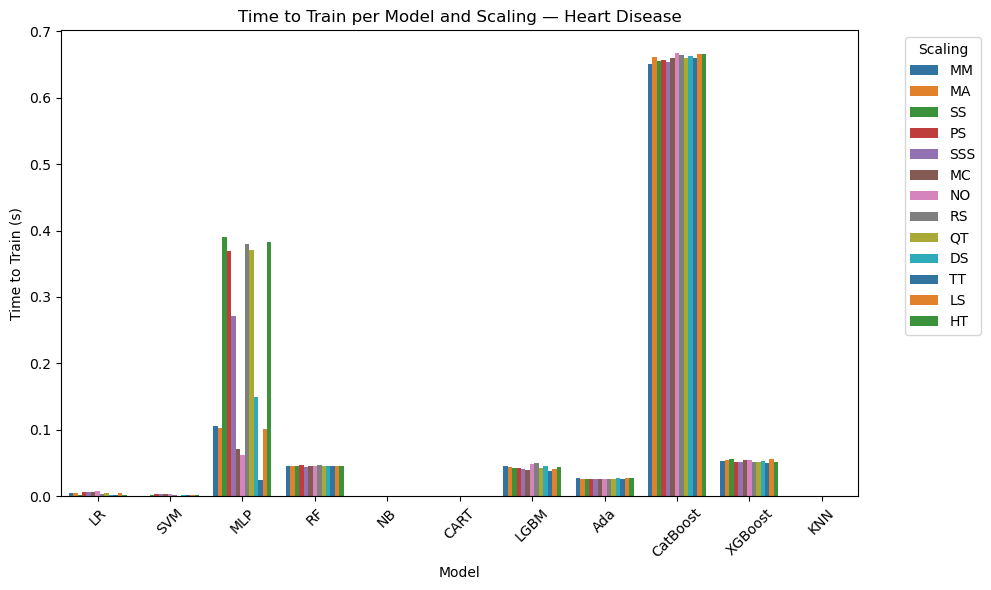

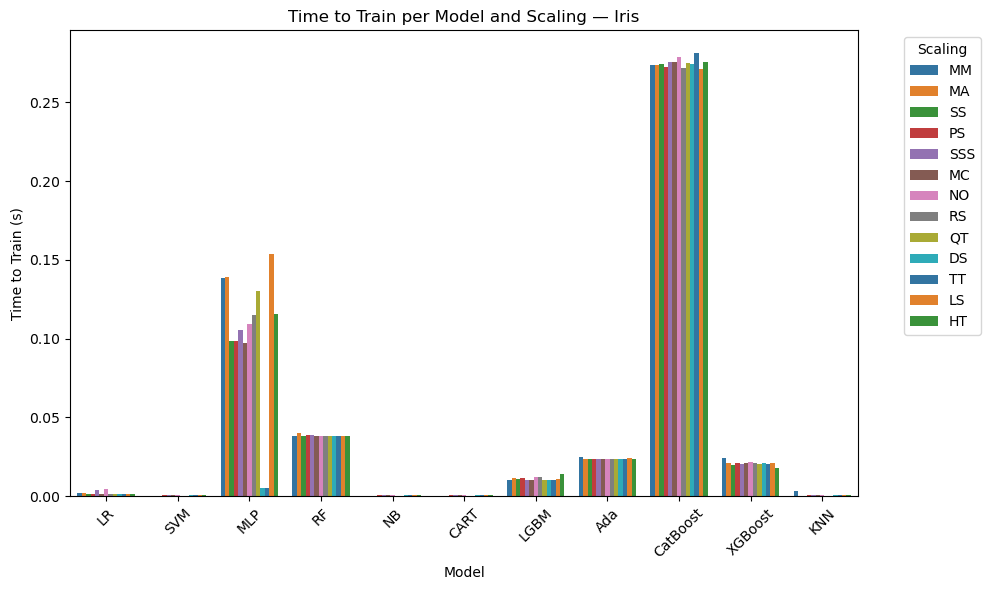

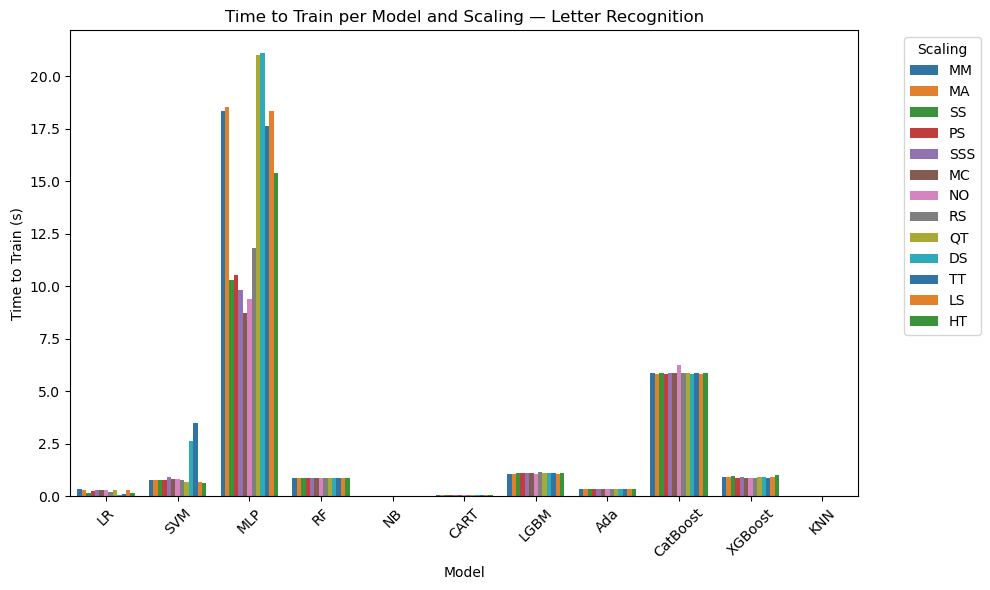

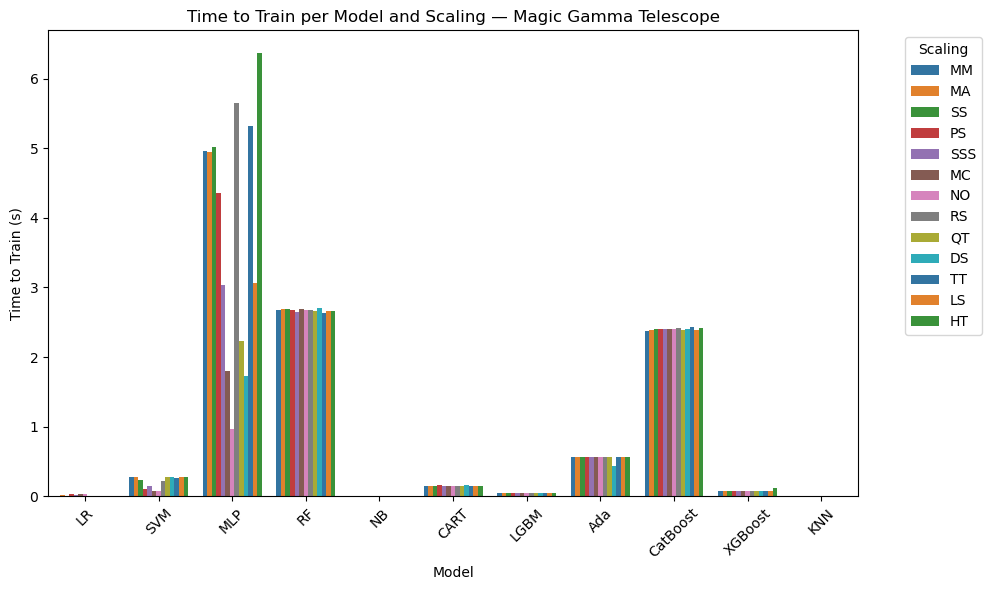

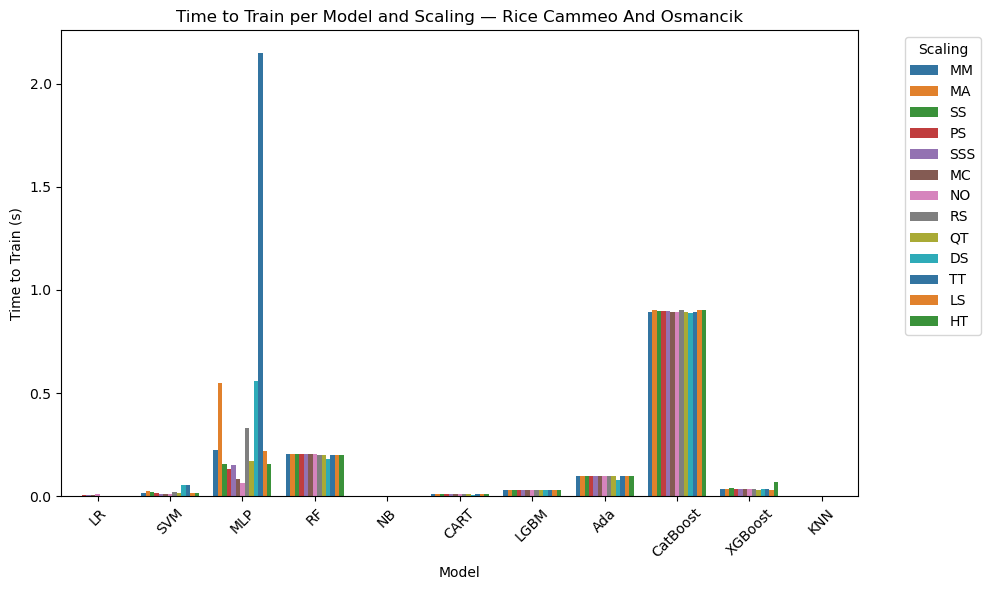

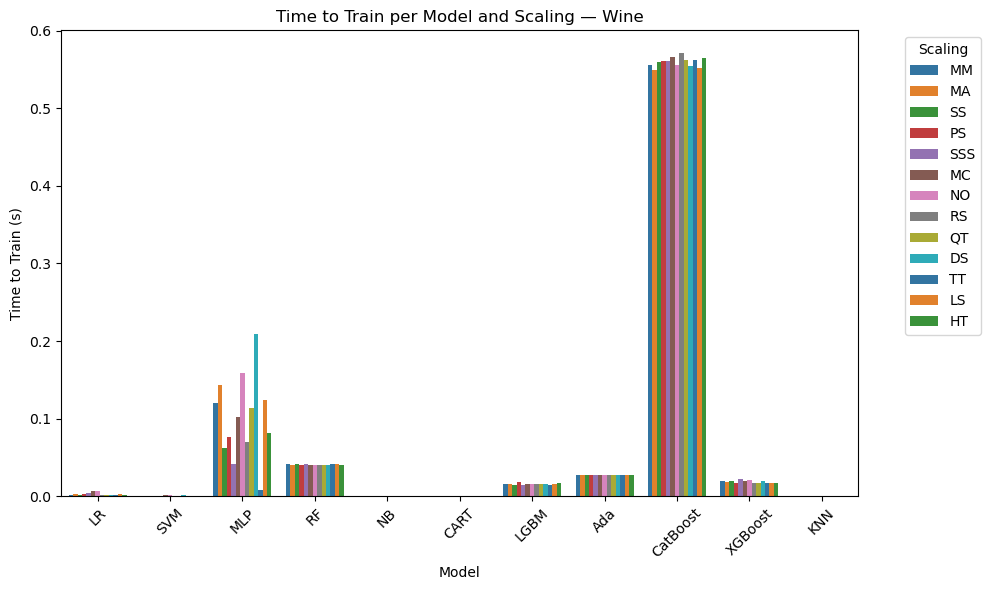

In [7]:
# Create output directory
output_dir = "results/tables_time_train_classification"
os.makedirs(output_dir, exist_ok=True)

# List of datasets to process
datasets = df_results['dataset_name'].loc[df_results['accuracy'].notna()].unique()

for dataset in datasets:
    df_filtered = df_results[df_results['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_filtered,
        x='model',
        y='time_train',
        hue='scaling_abbrev',
        palette='tab10'
    )
    plt.title(f"Time to Train per Model and Scaling — {nice_title}")
    plt.ylim()
    plt.xticks(rotation=45)
    plt.ylabel("Time to Train (s)")
    plt.xlabel("Model")
    plt.legend(title="Scaling", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Save figure
    plt.savefig(f"{output_dir}/{dataset}_train_time.pdf")
    plt.show()
    plt.close()


#### Tables and plot time to inference

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Create output directory
output_dir = "results/tables_time_inference_classification"
os.makedirs(output_dir, exist_ok=True)
df_class_analysis = df_results['dataset_name'].loc[df_results['accuracy'].notna()].unique()

def bold_max_mask(df):
    return df.eq(df.max(axis=1), axis=0)

for dataset in df_class_analysis:
    df_filtered_class = df_results[df_results['dataset_name'] == dataset]
    heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['time_inference'].mean().unstack()
    heat_df = heat_df.round(4)

    bold_mask = bold_max_mask(heat_df)

    fig, ax = plt.subplots(figsize=(12, 0.5 * len(heat_df) + 2))
    ax.axis('off')
    # ax.set_title(
    #     f"Experimental Results for '{dataset}' Dataset\nMean time_train by Model and Scaling Method",
    #     fontsize=14, weight='bold'
    # )

    table = ax.table(
        cellText=heat_df.values,
        rowLabels=heat_df.index,
        colLabels=heat_df.columns,
        loc='center',
        cellLoc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    # Bold max values
    for i, row in enumerate(bold_mask.values):
        for j, is_bold in enumerate(row):
            if is_bold:
                cell = table[(i + 1, j)]
                cell.set_fontsize(10)
                cell.set_text_props(weight='bold')

    # Save one PDF per dataset
    plt.savefig(f"{output_dir}/{dataset}_table_time_inference.pdf", bbox_inches='tight')
    plt.close(fig)


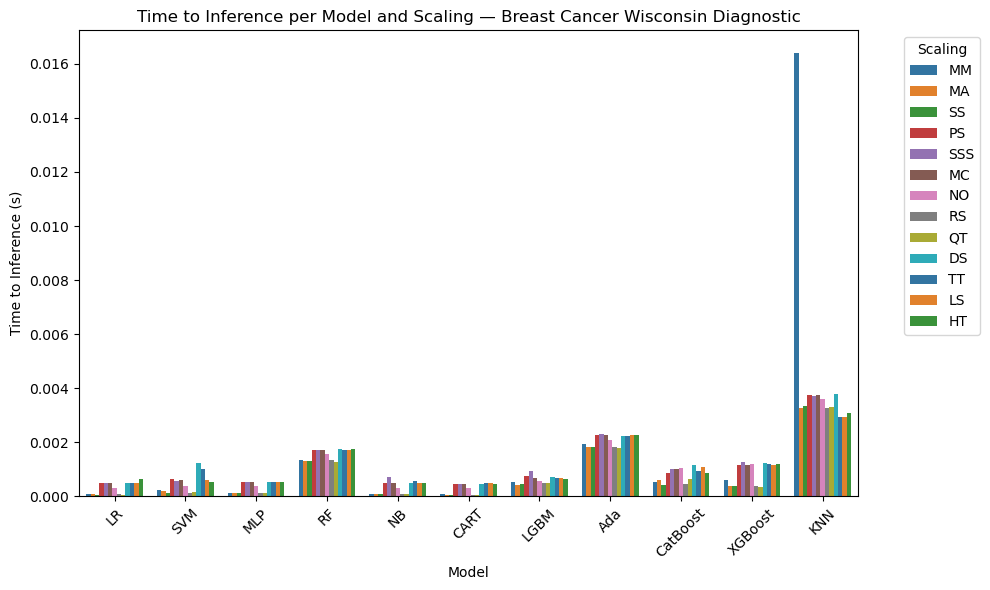

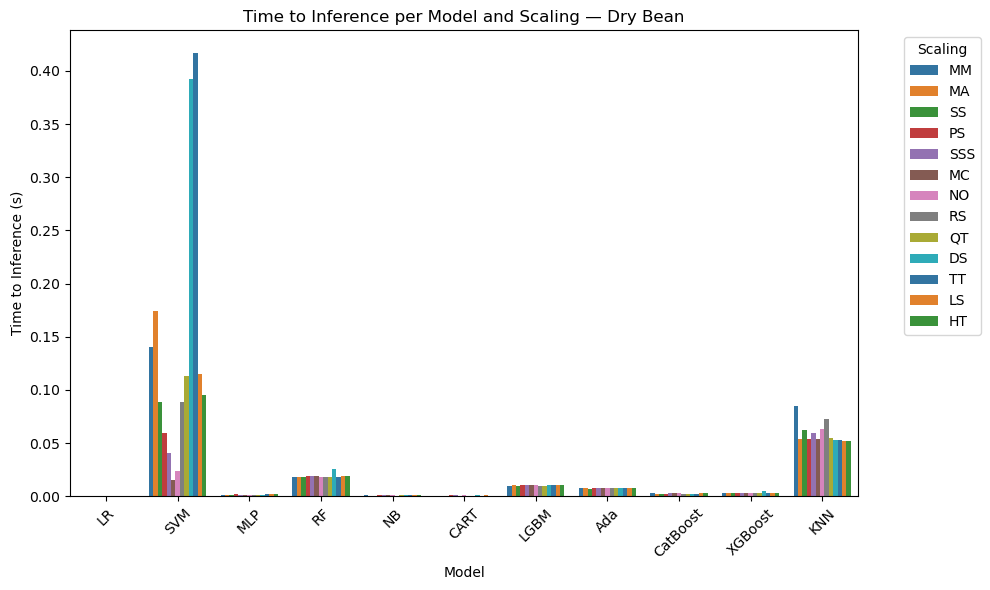

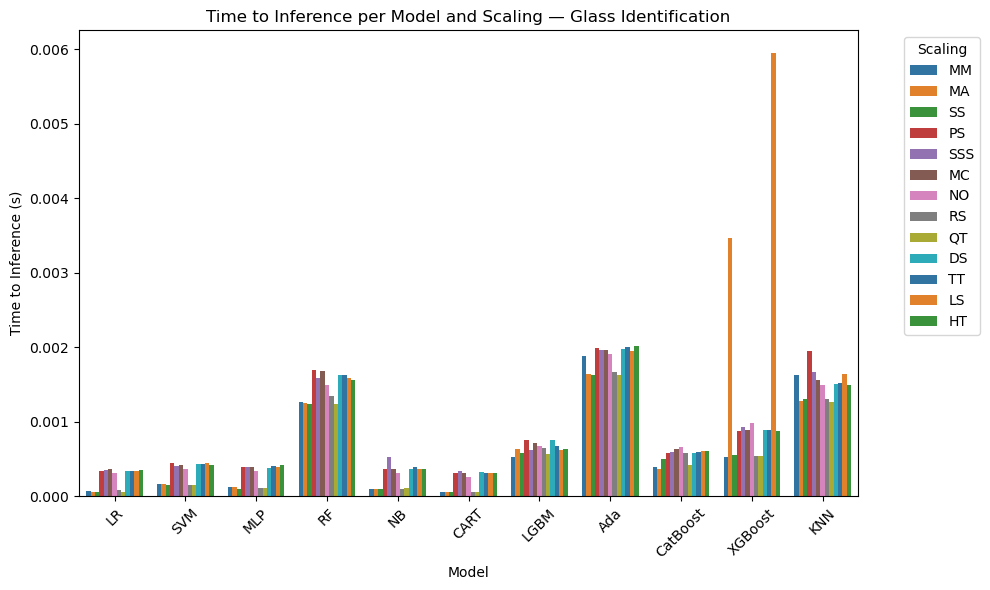

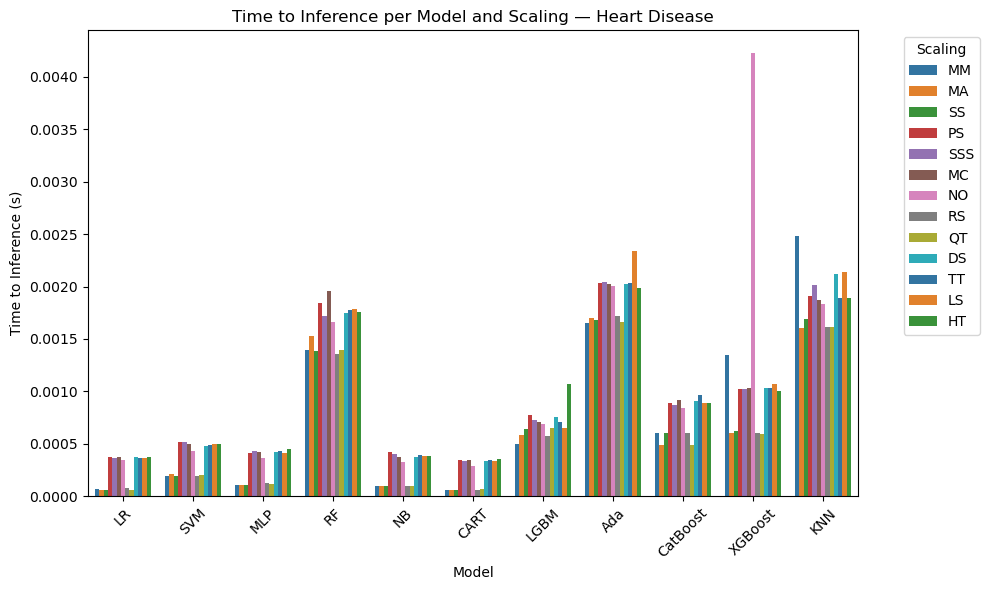

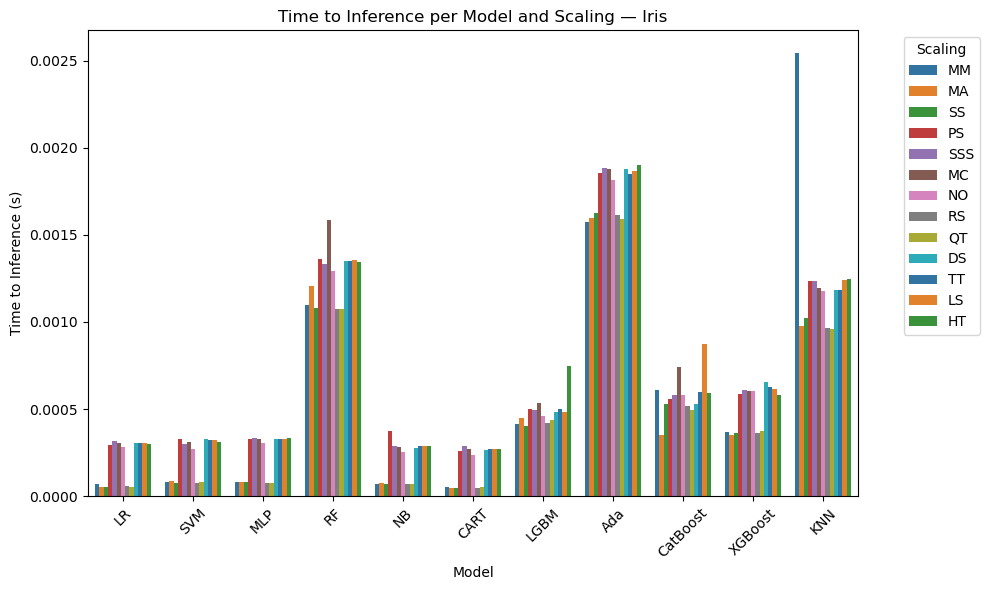

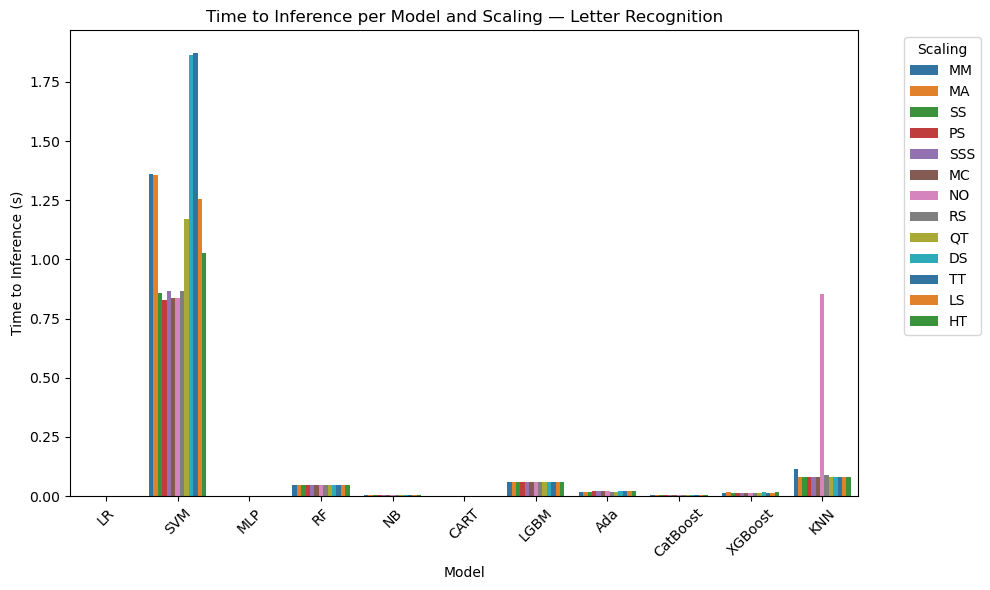

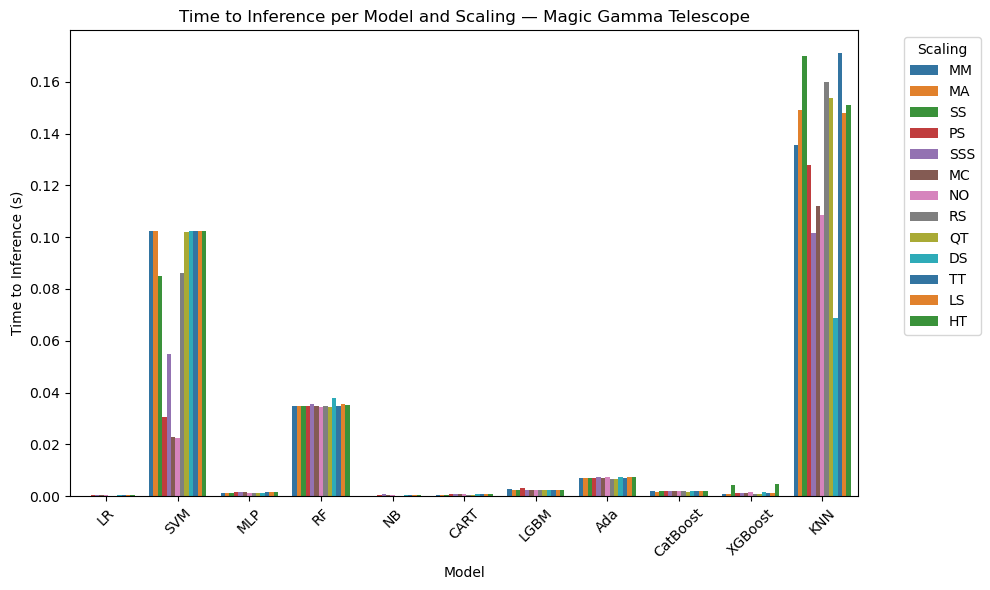

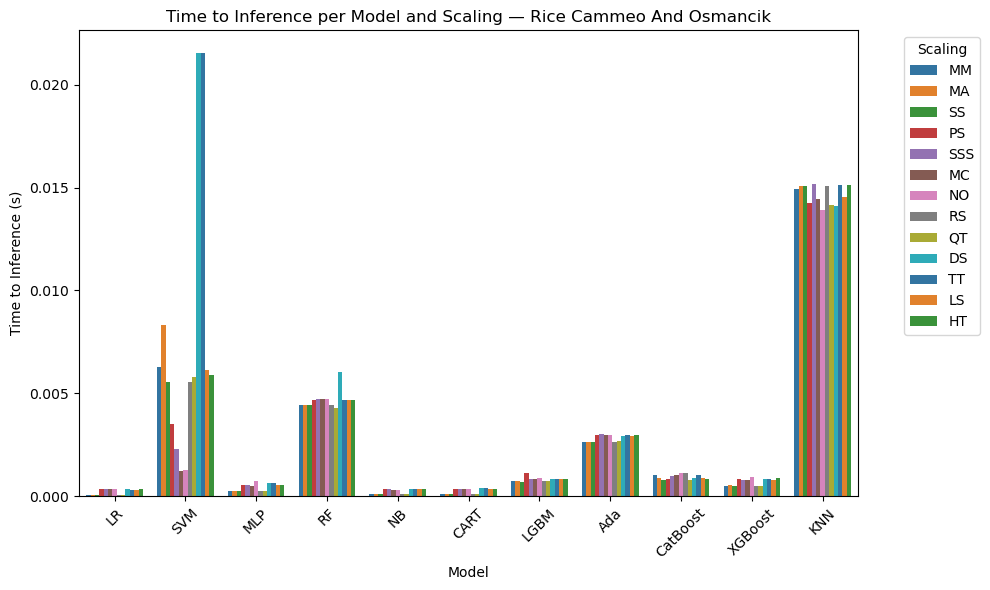

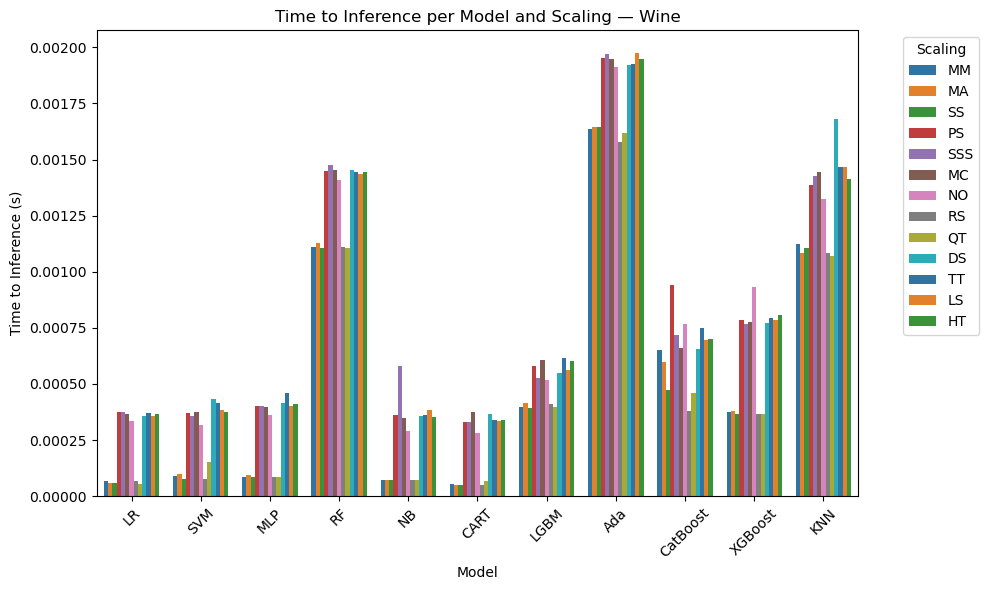

In [9]:
# Create output directory
os.makedirs(output_dir, exist_ok=True)

# List of datasets to process
datasets = df_results['dataset_name'].loc[df_results['accuracy'].notna()].unique()

for dataset in datasets:
    df_filtered = df_results[df_results['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_filtered,
        x='model',
        y='time_inference',
        hue='scaling_abbrev',
        palette='tab10'
    )
    plt.title(f"Time to Inference per Model and Scaling — {nice_title}")
    plt.ylim()
    plt.xticks(rotation=45)
    plt.ylabel("Time to Inference (s)")
    plt.xlabel("Model")
    plt.legend(title="Scaling", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Save figure
    plt.savefig(f"{output_dir}/{dataset}_inference_time.pdf")
    plt.show()
    plt.close()


### Memory usage for each scaling

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Create output directory
output_dir = "results/tables_memory_classification"
os.makedirs(output_dir, exist_ok=True)
df_class_analysis = df_results['dataset_name'].loc[df_results['accuracy'].notna()].unique()

def bold_max_mask(df):
    return df.eq(df.max(axis=1), axis=0)

for dataset in df_class_analysis:
    df_filtered_class = df_results[df_results['dataset_name'] == dataset]
    heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['memory_used_kb'].mean().unstack()
    heat_df = heat_df.round(4)

    bold_mask = bold_max_mask(heat_df)

    fig, ax = plt.subplots(figsize=(12, 0.5 * len(heat_df) + 2))
    ax.axis('off')
    # ax.set_title(
    #     f"Experimental Results for '{dataset}' Dataset\nMean time_train by Model and Scaling Method",
    #     fontsize=14, weight='bold'
    # )

    table = ax.table(
        cellText=heat_df.values,
        rowLabels=heat_df.index,
        colLabels=heat_df.columns,
        loc='center',
        cellLoc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    # Bold max values
    for i, row in enumerate(bold_mask.values):
        for j, is_bold in enumerate(row):
            if is_bold:
                cell = table[(i + 1, j)]
                cell.set_fontsize(10)
                cell.set_text_props(weight='bold')

    # Save one PDF per dataset
    plt.savefig(f"{output_dir}/{dataset}_table_memory.pdf", bbox_inches='tight')
    plt.close(fig)


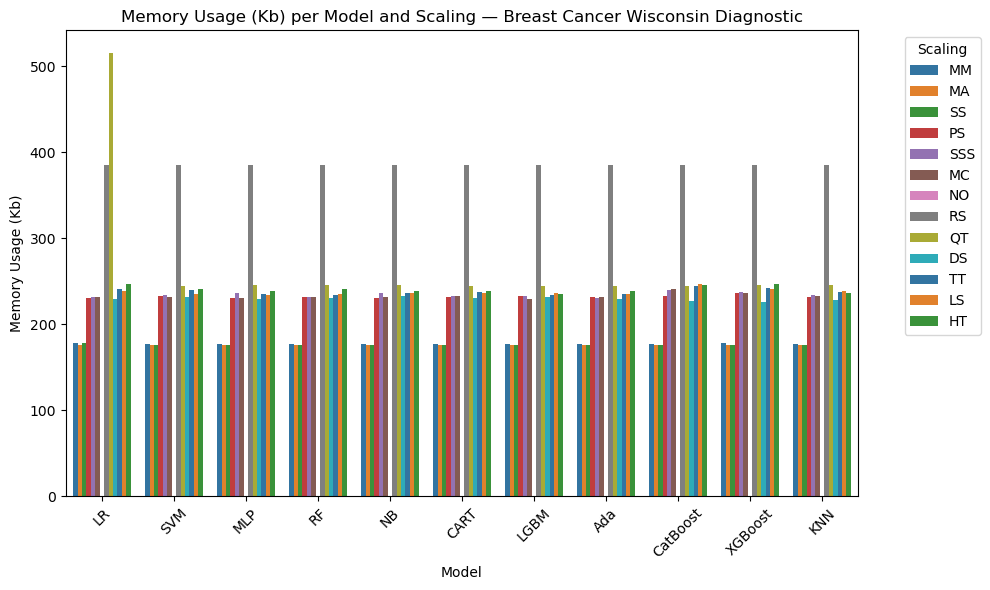

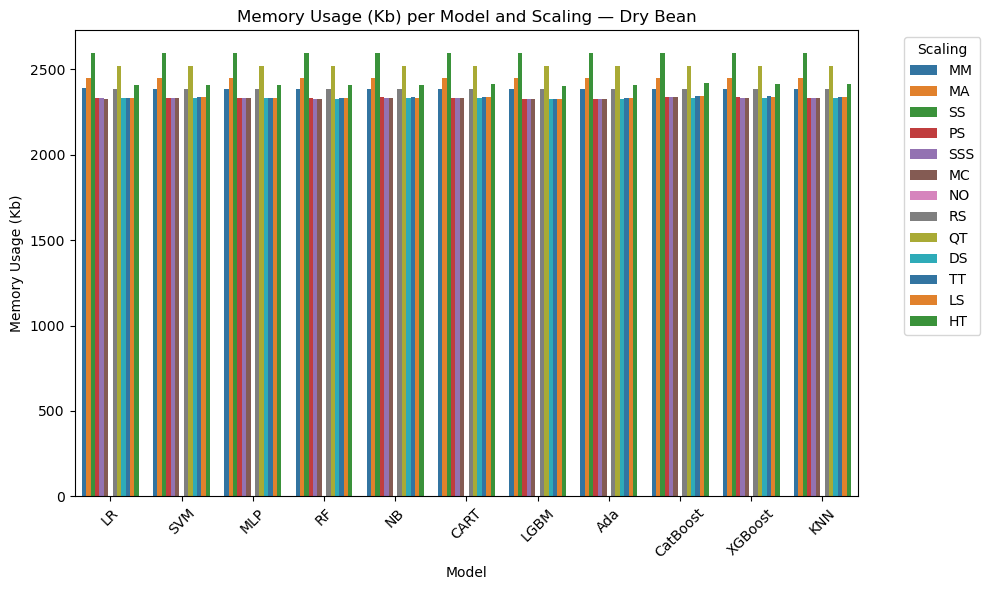

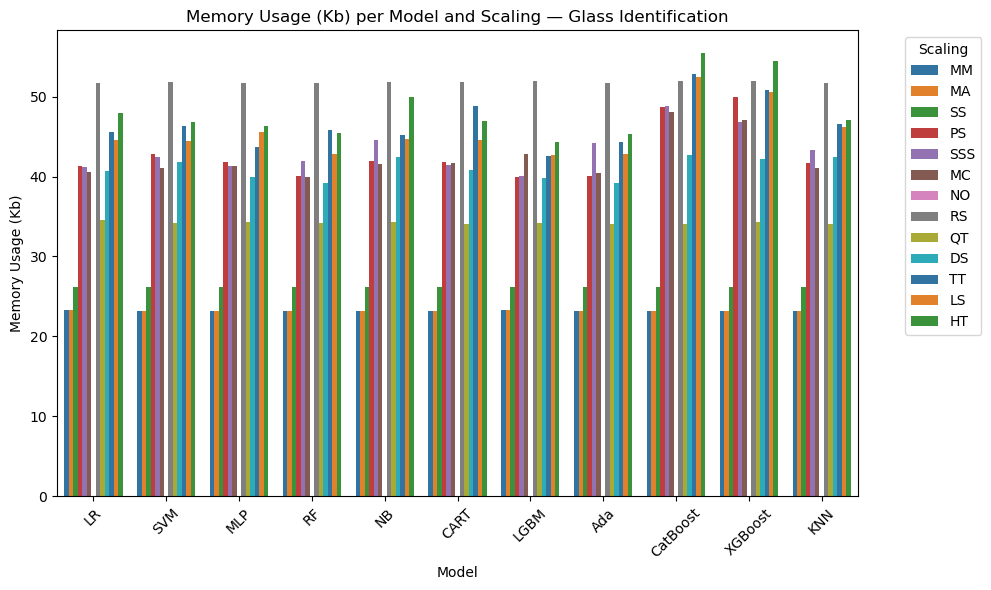

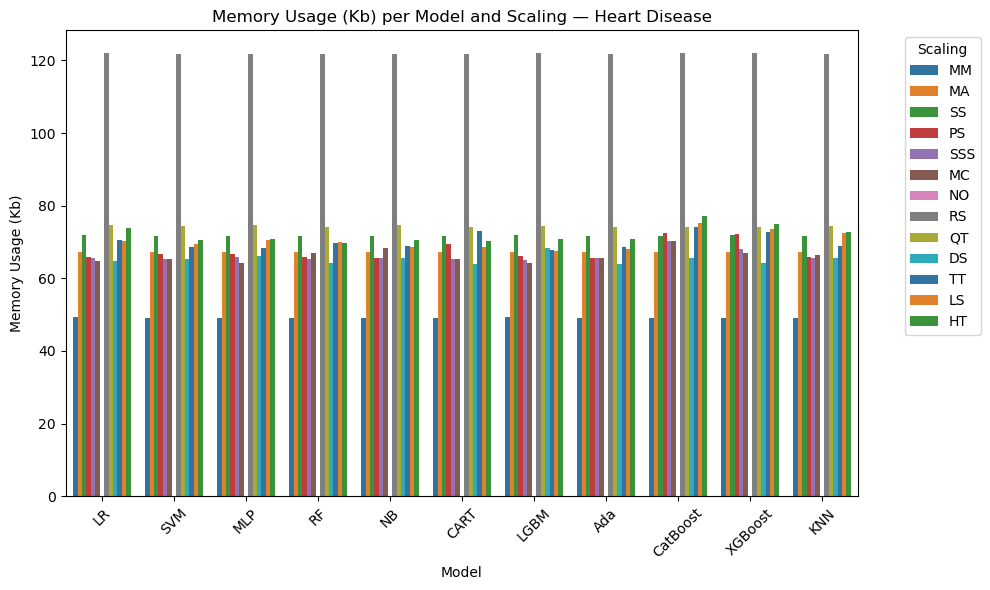

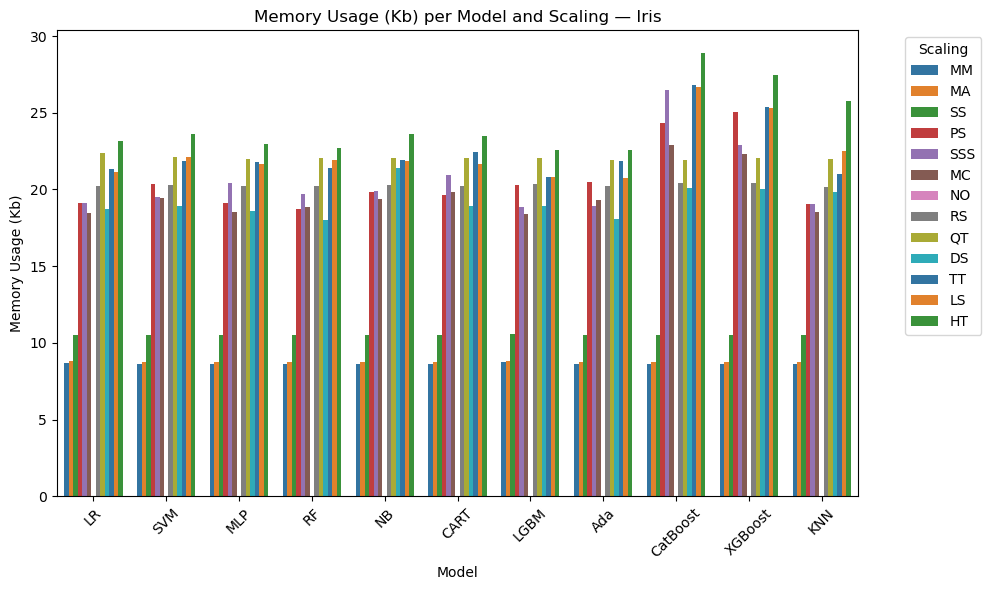

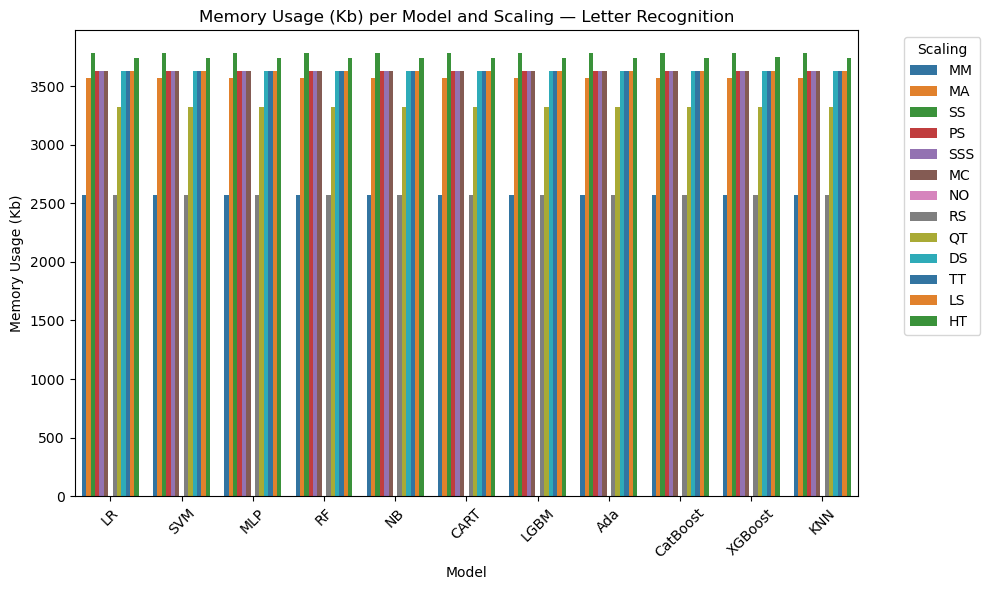

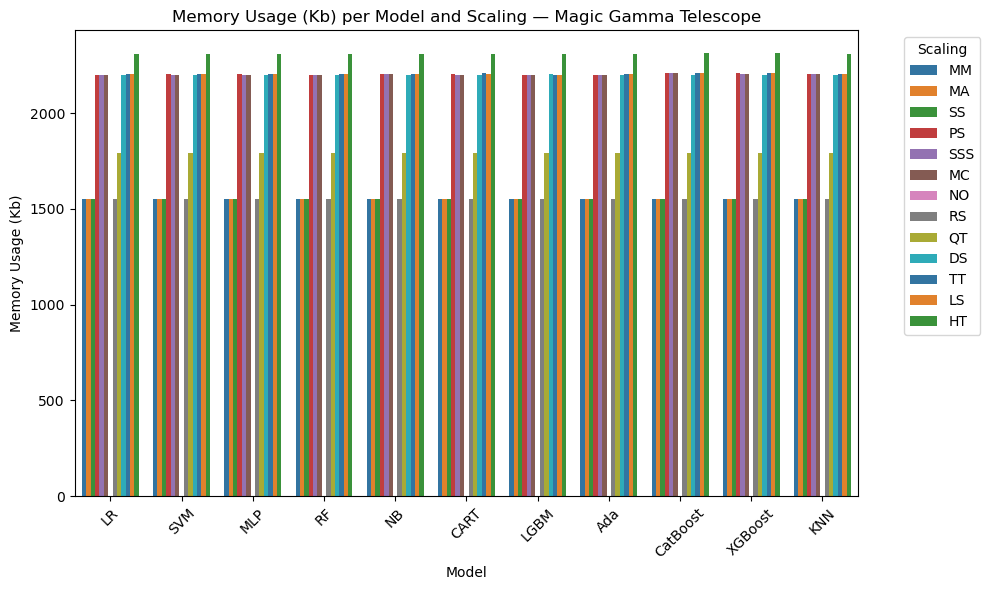

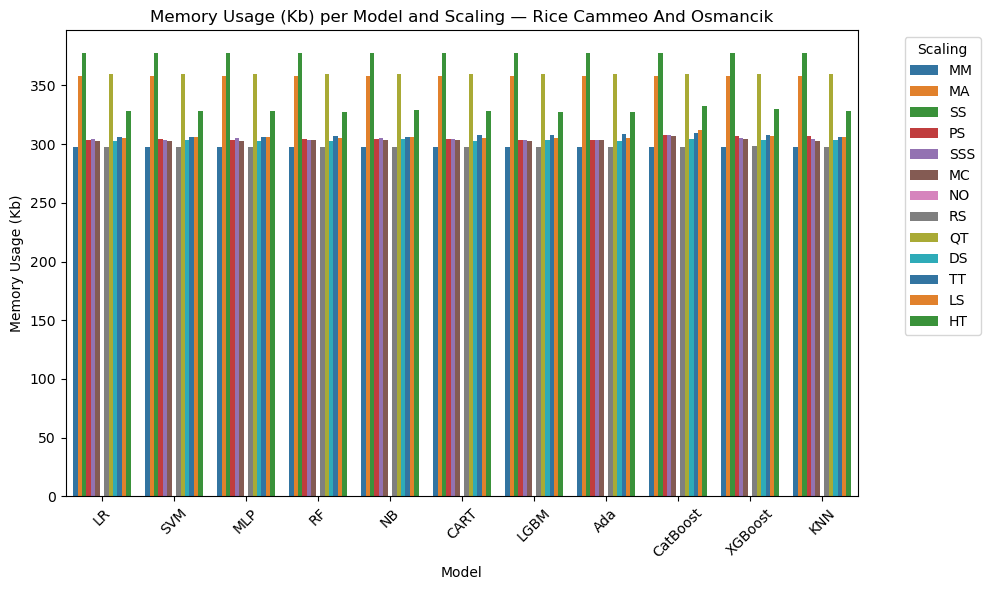

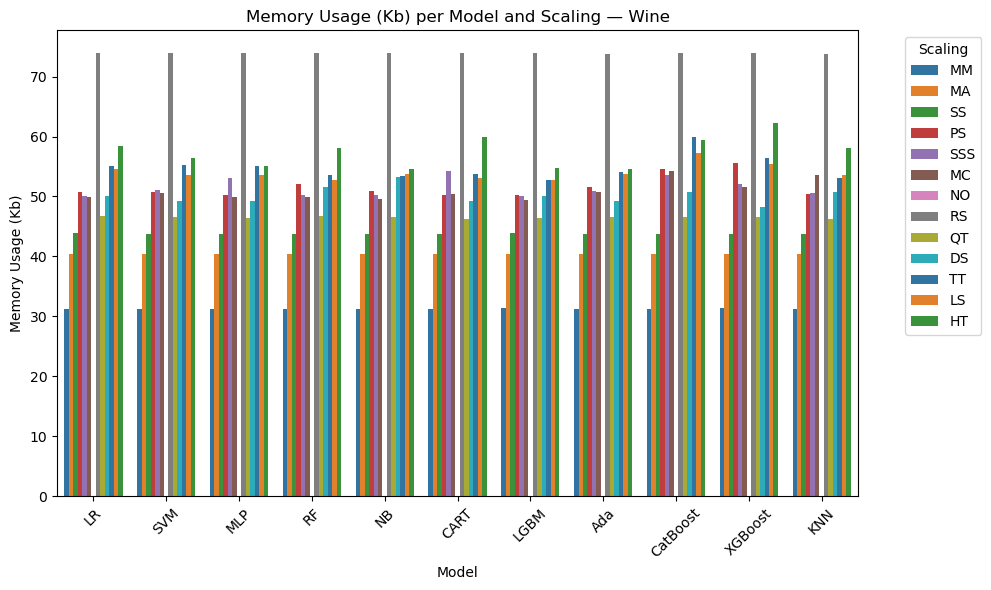

In [11]:
# Create output directory
os.makedirs(output_dir, exist_ok=True)

# List of datasets to process
datasets = df_results['dataset_name'].loc[df_results['accuracy'].notna()].unique()

for dataset in datasets:
    df_filtered = df_results[df_results['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_filtered,
        x='model',
        y='memory_used_kb',
        hue='scaling_abbrev',
        palette='tab10'
    )
    plt.title(f"Memory Usage (Kb) per Model and Scaling — {nice_title}")
    plt.ylim()
    plt.xticks(rotation=45)
    plt.ylabel("Memory Usage (Kb)")
    plt.xlabel("Model")
    plt.legend(title="Scaling", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Save figure
    plt.savefig(f"{output_dir}/{dataset}_memory.pdf")
    plt.show()
    plt.close()


## Classifications Results

### Regression results for in each dataset for each model and scaling

#### $R^2$

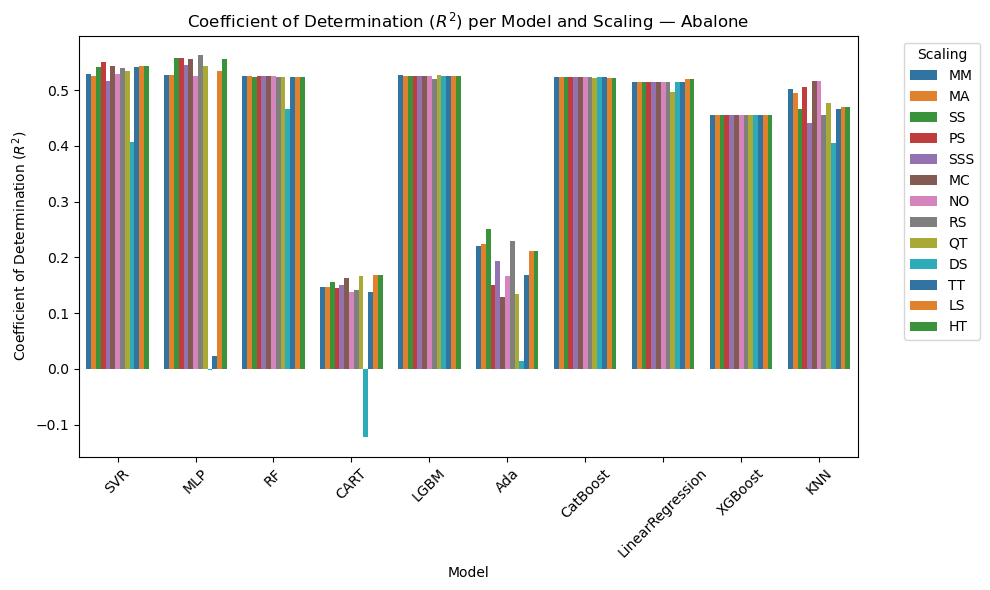

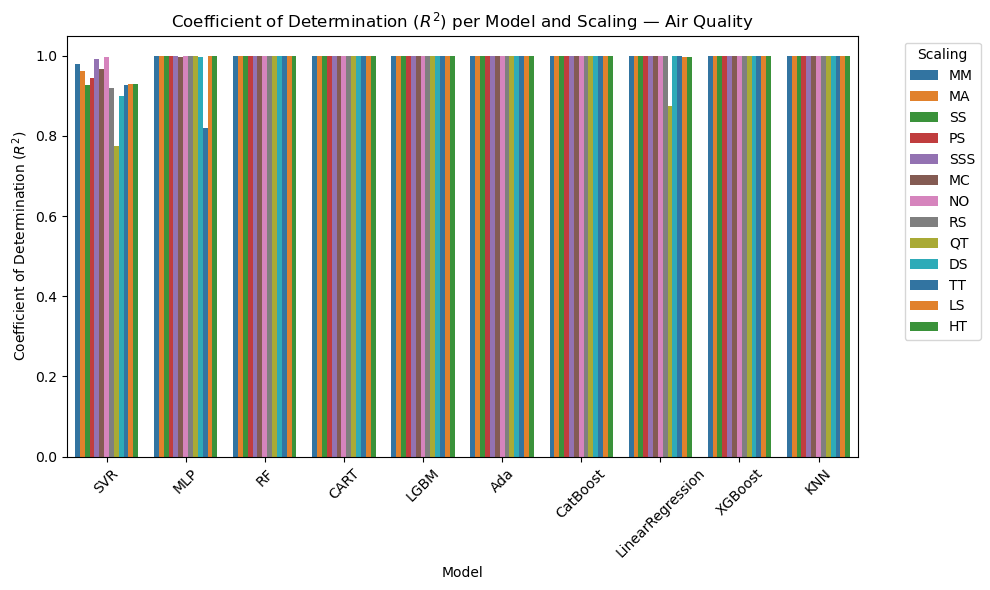

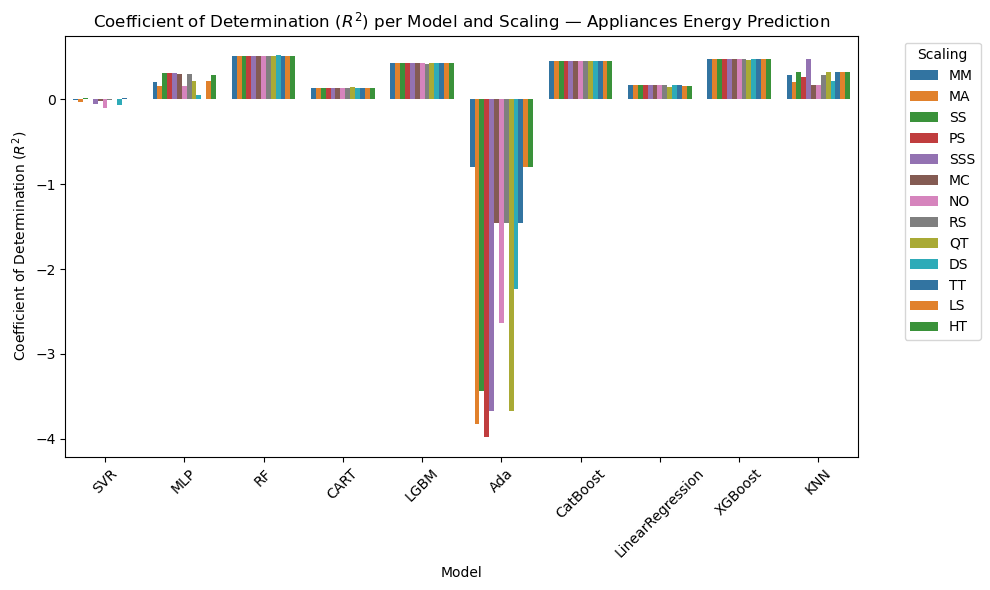

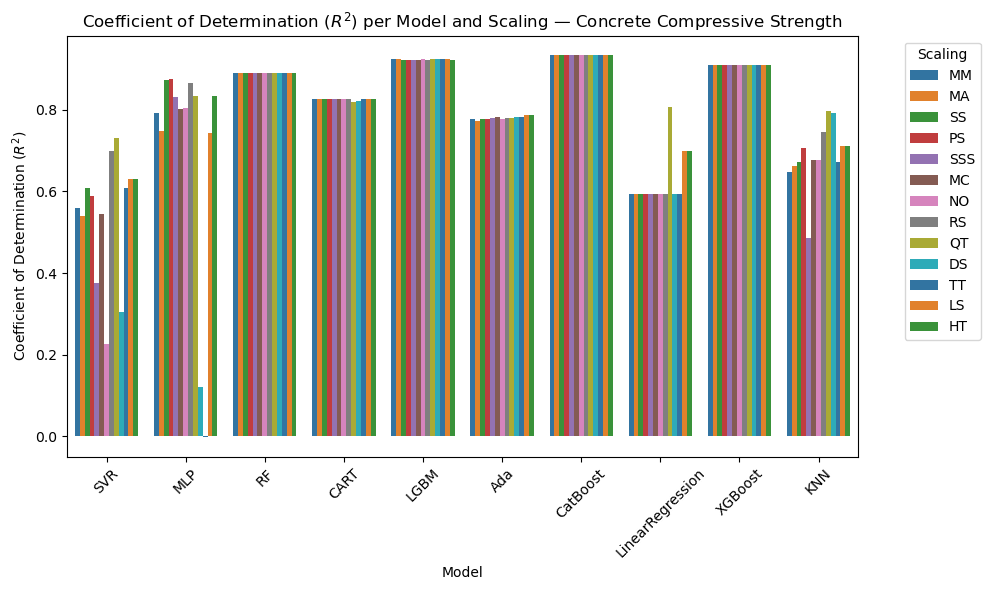

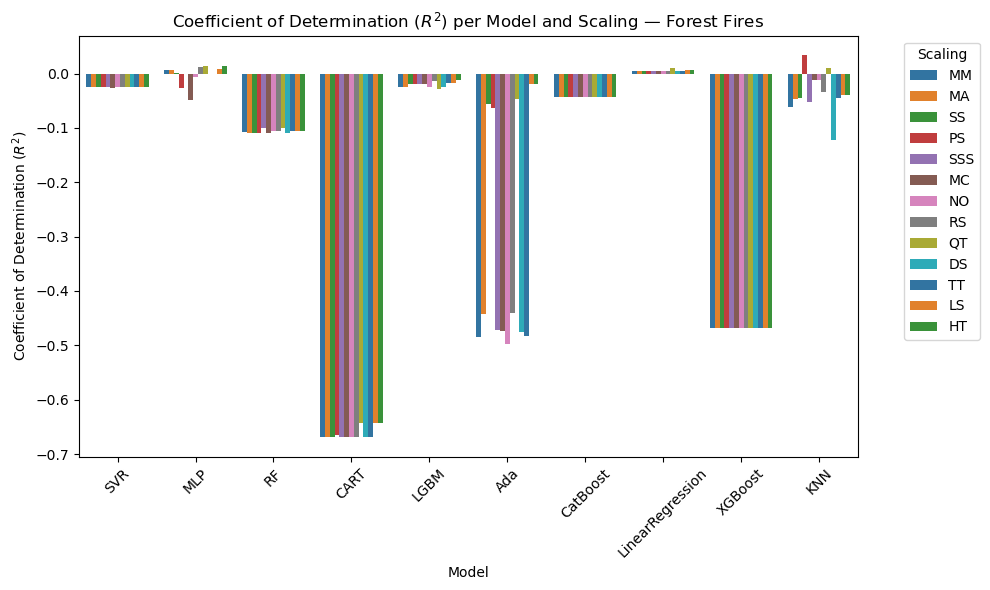

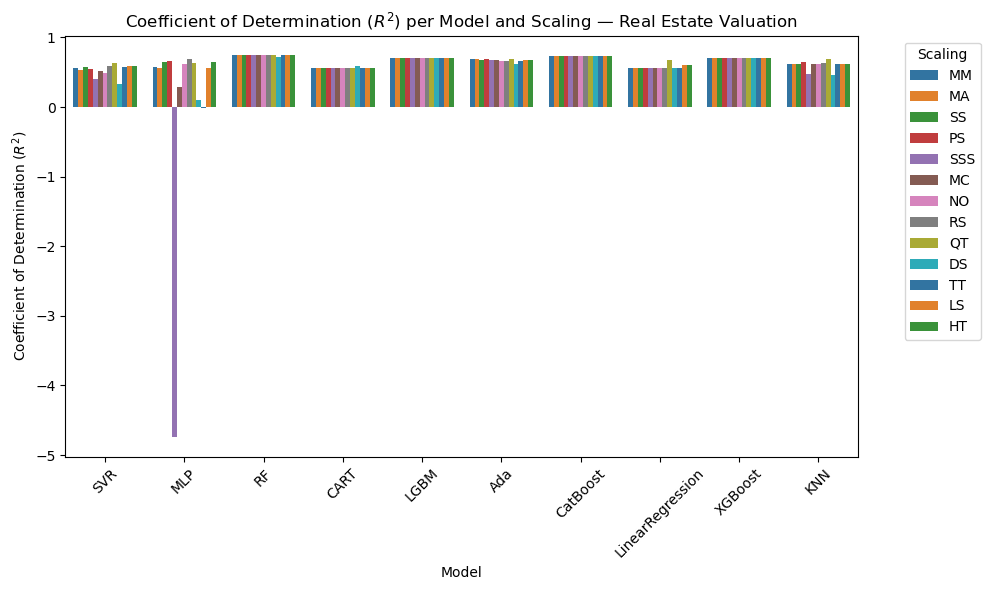

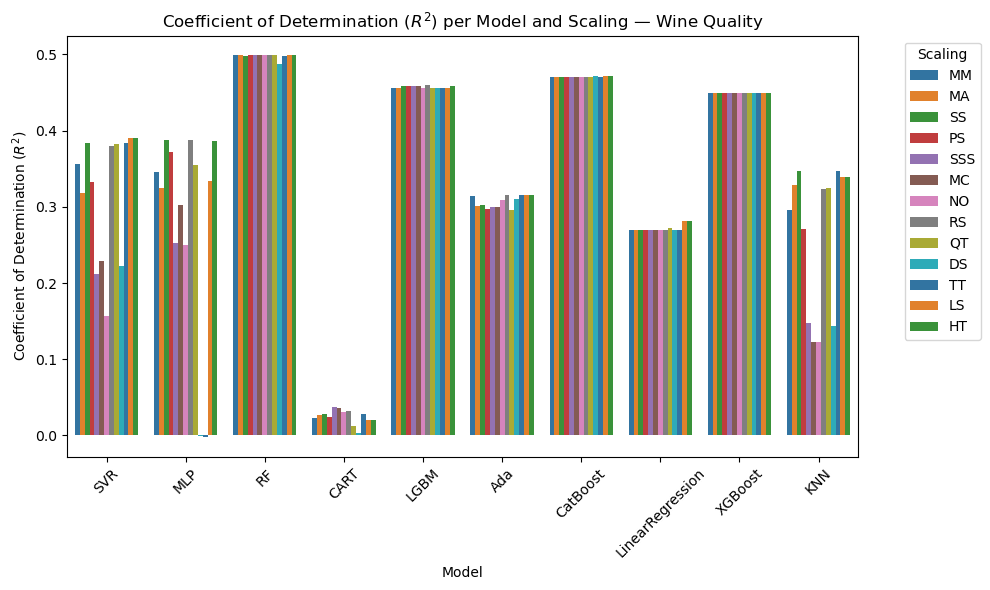

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Create output directory
output_dir = "results/tables_r2_regression"
os.makedirs(output_dir, exist_ok=True)
df_class_analysis = df_results['dataset_name'].loc[df_results['r2score'].notna()].unique()

def bold_max_mask(df):
    return df.eq(df.max(axis=1), axis=0)

for dataset in df_class_analysis:
    df_filtered_class = df_results[df_results['dataset_name'] == dataset]
    heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['r2score'].mean().unstack()
    heat_df = heat_df.round(4)

    bold_mask = bold_max_mask(heat_df)

    fig, ax = plt.subplots(figsize=(12, 0.5 * len(heat_df) + 2))
    ax.axis('off')
    # ax.set_title(
    #     f"Experimental Results for '{dataset}' Dataset\nMean time_train by Model and Scaling Method",
    #     fontsize=14, weight='bold'
    # )

    table = ax.table(
        cellText=heat_df.values,
        rowLabels=heat_df.index,
        colLabels=heat_df.columns,
        loc='center',
        cellLoc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    # Bold max values
    for i, row in enumerate(bold_mask.values):
        for j, is_bold in enumerate(row):
            if is_bold:
                cell = table[(i + 1, j)]
                cell.set_fontsize(10)
                cell.set_text_props(weight='bold')

    # Save one PDF per dataset
    plt.savefig(f"{output_dir}/{dataset}_table_r2score.pdf", bbox_inches='tight')
    plt.close(fig)

# Create output directory
os.makedirs(output_dir, exist_ok=True)

# List of datasets to process
datasets = df_results['dataset_name'].loc[df_results['r2score'].notna()].unique()

for dataset in datasets:
    df_filtered = df_results[df_results['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_filtered,
        x='model',
        y='r2score',
        hue='scaling_abbrev',
        palette='tab10'
    )
    plt.title(f"Coefficient of Determination ($R^2$) per Model and Scaling — {nice_title}")
    plt.ylim()
    plt.xticks(rotation=45)
    plt.ylabel("Coefficient of Determination ($R^2$)")
    plt.xlabel("Model")
    plt.legend(title="Scaling", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Save figure
    plt.savefig(f"{output_dir}/{dataset}_r2score.pdf")
    plt.show()
    plt.close()


#### Mean Squared Error (MSE)

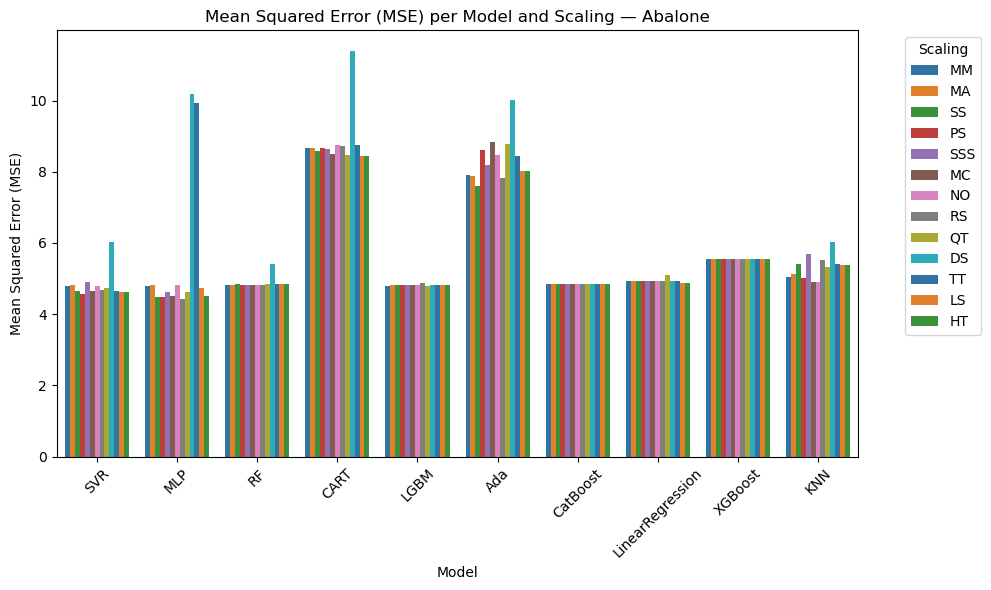

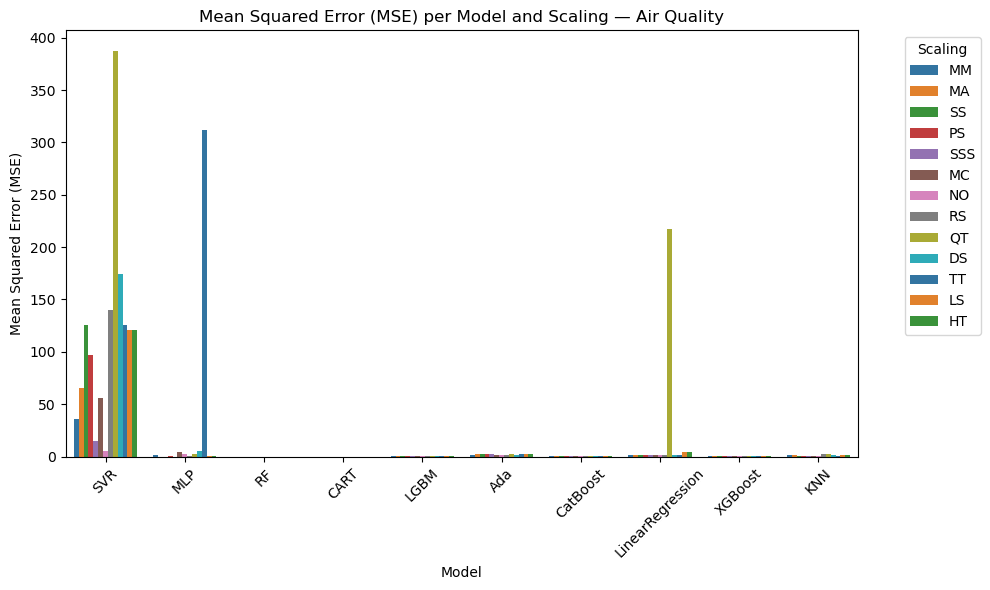

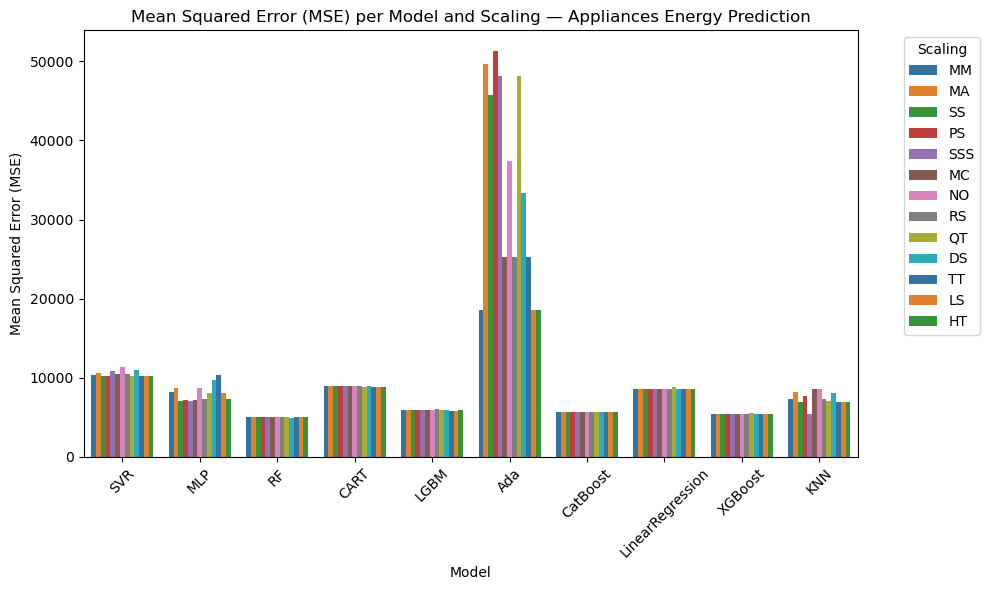

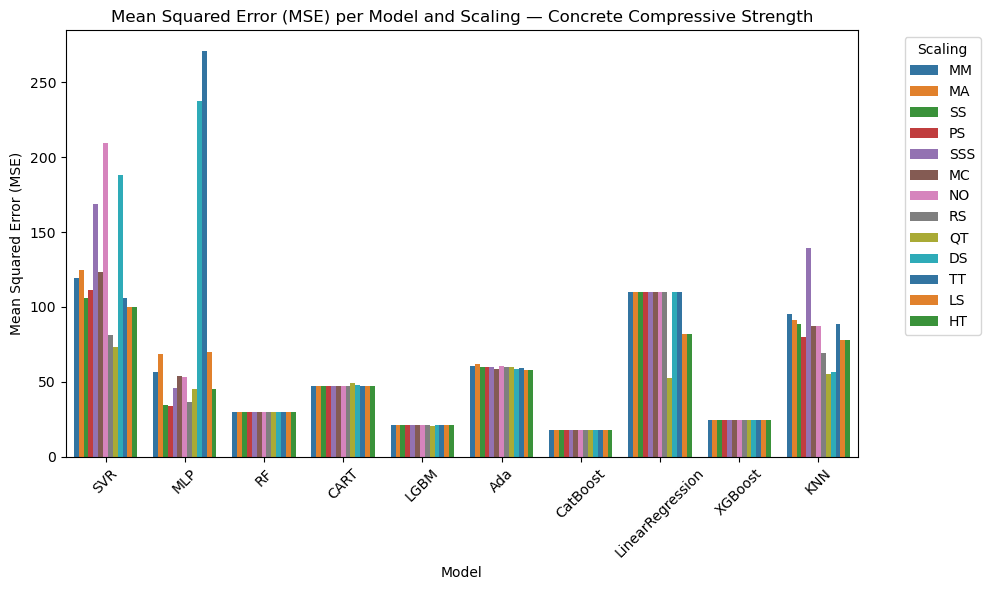

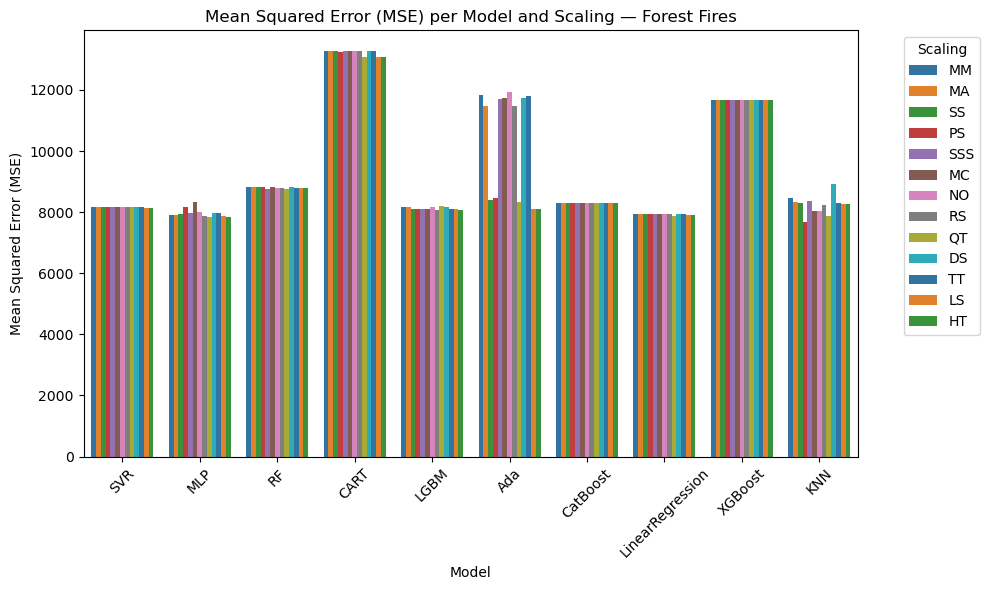

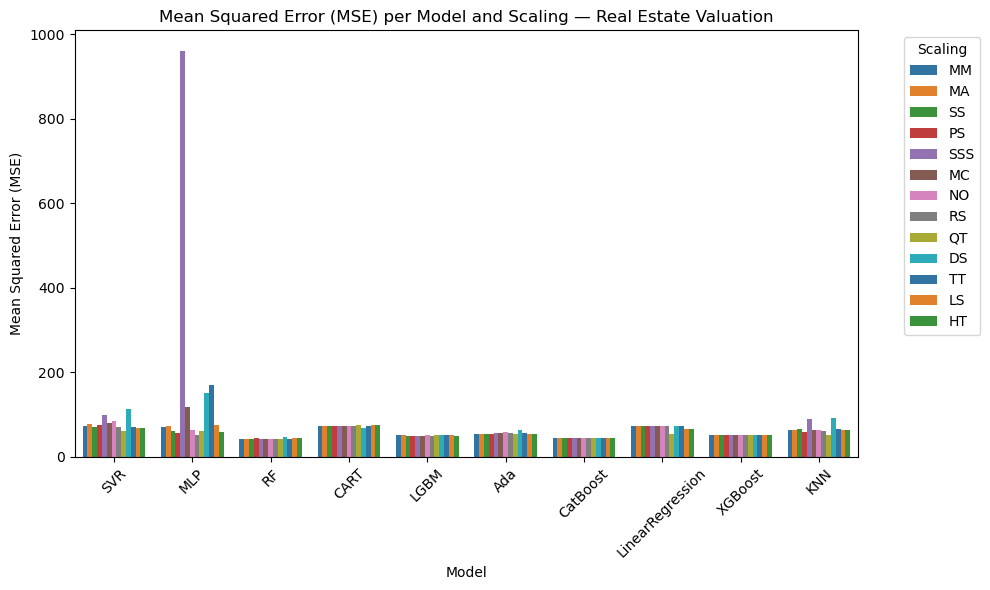

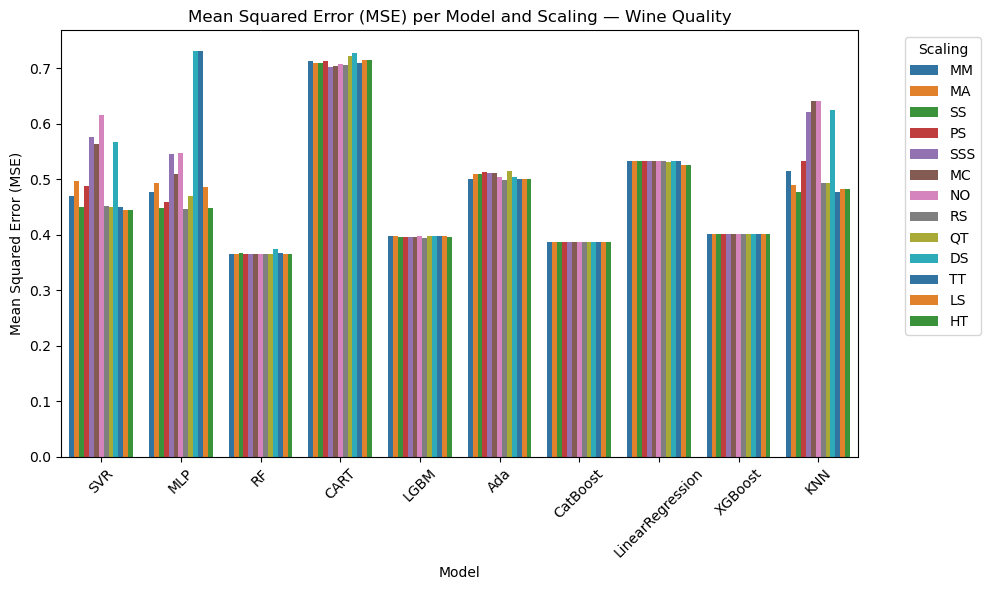

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Create output directory
output_dir = "results/tables_mse_regression"
os.makedirs(output_dir, exist_ok=True)
df_class_analysis = df_results['dataset_name'].loc[df_results['mse'].notna()].unique()

def bold_max_mask(df):
    return df.eq(df.max(axis=1), axis=0)

for dataset in df_class_analysis:
    df_filtered_class = df_results[df_results['dataset_name'] == dataset]
    heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['mse'].mean().unstack()
    heat_df = heat_df.round(4)

    bold_mask = bold_max_mask(heat_df)

    fig, ax = plt.subplots(figsize=(12, 0.5 * len(heat_df) + 2))
    ax.axis('off')
    # ax.set_title(
    #     f"Experimental Results for '{dataset}' Dataset\nMean time_train by Model and Scaling Method",
    #     fontsize=14, weight='bold'
    # )

    table = ax.table(
        cellText=heat_df.values,
        rowLabels=heat_df.index,
        colLabels=heat_df.columns,
        loc='center',
        cellLoc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    # Bold max values
    for i, row in enumerate(bold_mask.values):
        for j, is_bold in enumerate(row):
            if is_bold:
                cell = table[(i + 1, j)]
                cell.set_fontsize(10)
                cell.set_text_props(weight='bold')

    # Save one PDF per dataset
    plt.savefig(f"{output_dir}/{dataset}_table_mse.pdf", bbox_inches='tight')
    plt.close(fig)

# Create output directory
os.makedirs(output_dir, exist_ok=True)

# List of datasets to process
datasets = df_results['dataset_name'].loc[df_results['mse'].notna()].unique()

for dataset in datasets:
    df_filtered = df_results[df_results['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_filtered,
        x='model',
        y='mse',
        hue='scaling_abbrev',
        palette='tab10'
    )
    plt.title(f"Mean Squared Error (MSE) per Model and Scaling — {nice_title}")
    plt.ylim()
    plt.xticks(rotation=45)
    plt.ylabel("Mean Squared Error (MSE)")
    plt.xlabel("Model")
    plt.legend(title="Scaling", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Save figure
    plt.savefig(f"{output_dir}/{dataset}_mse.pdf")
    plt.show()
    plt.close()


#### MAE

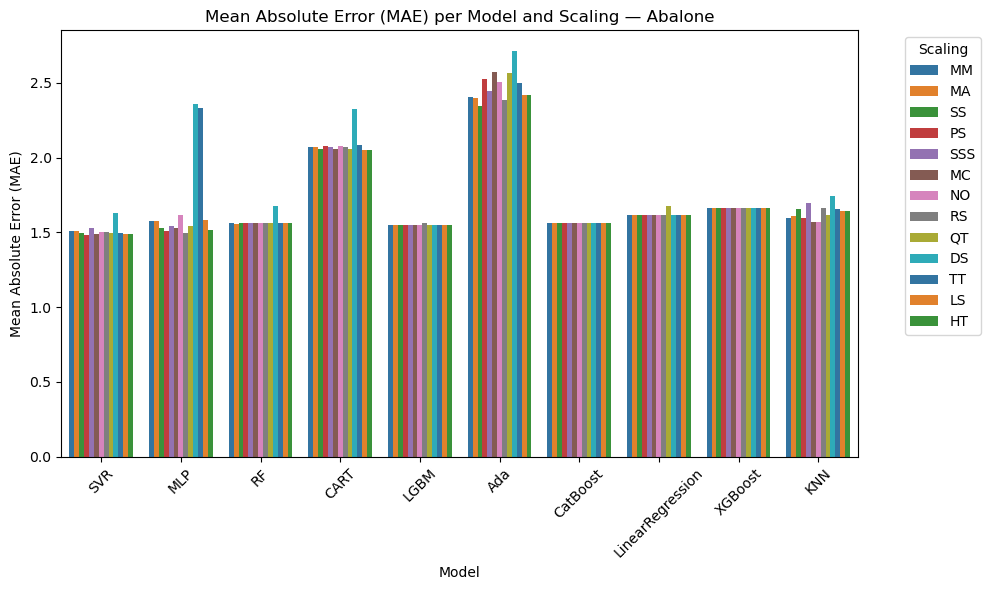

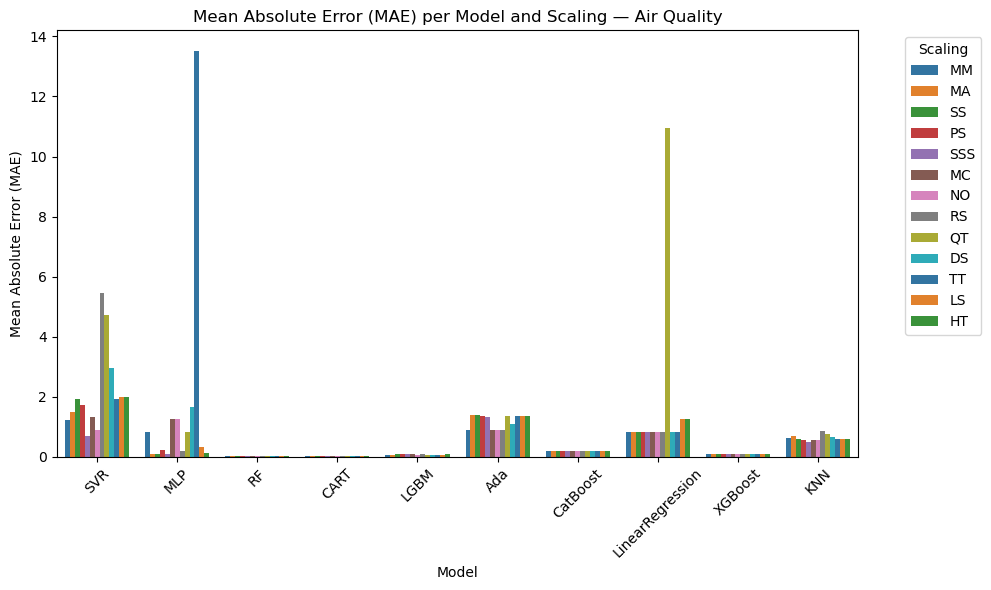

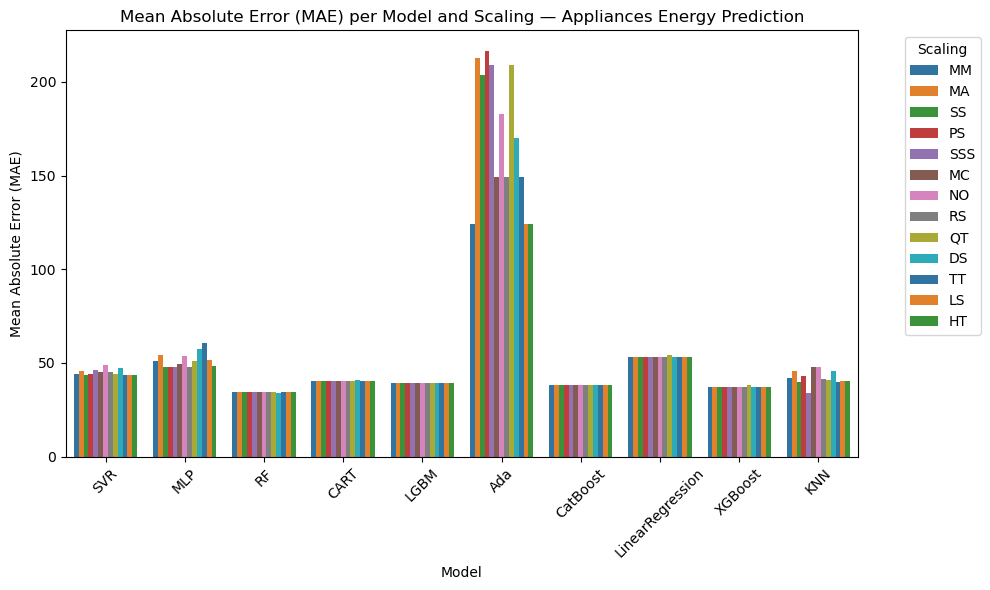

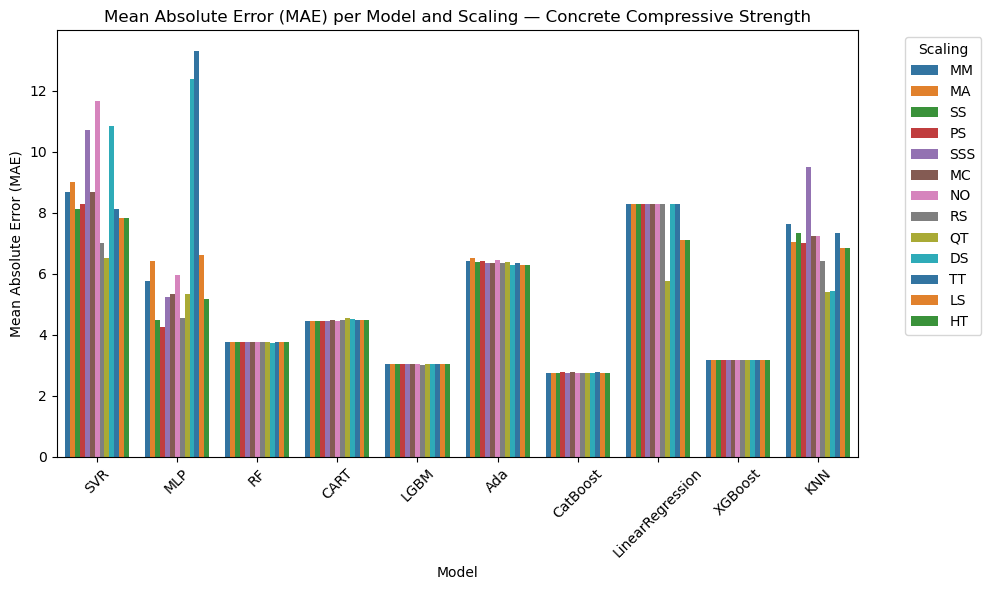

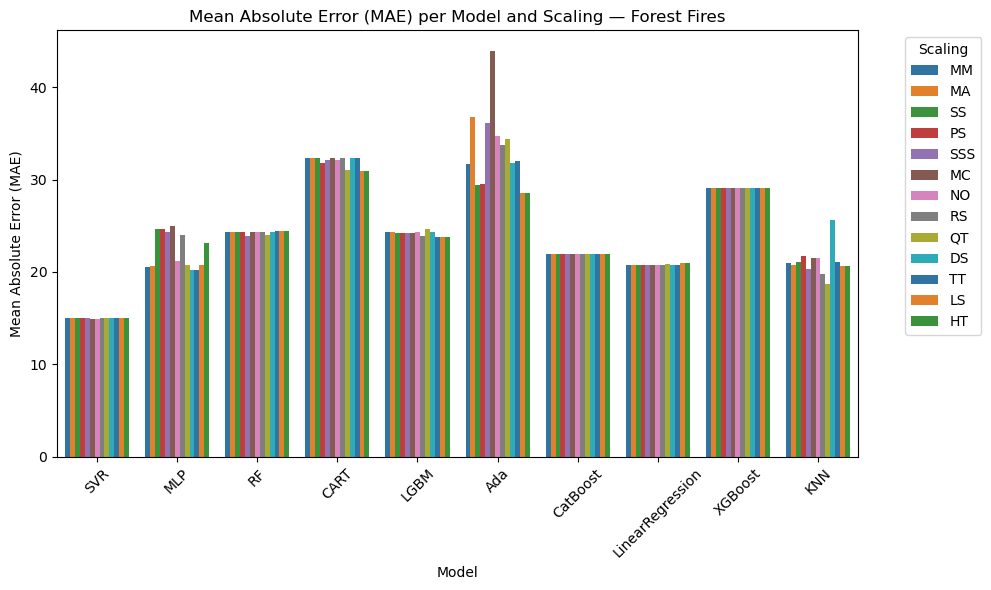

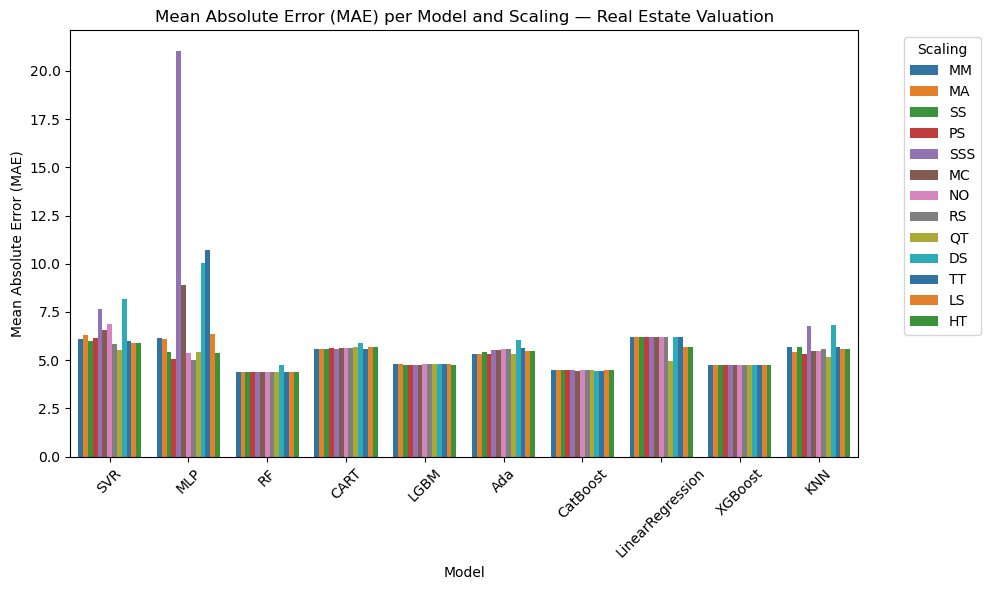

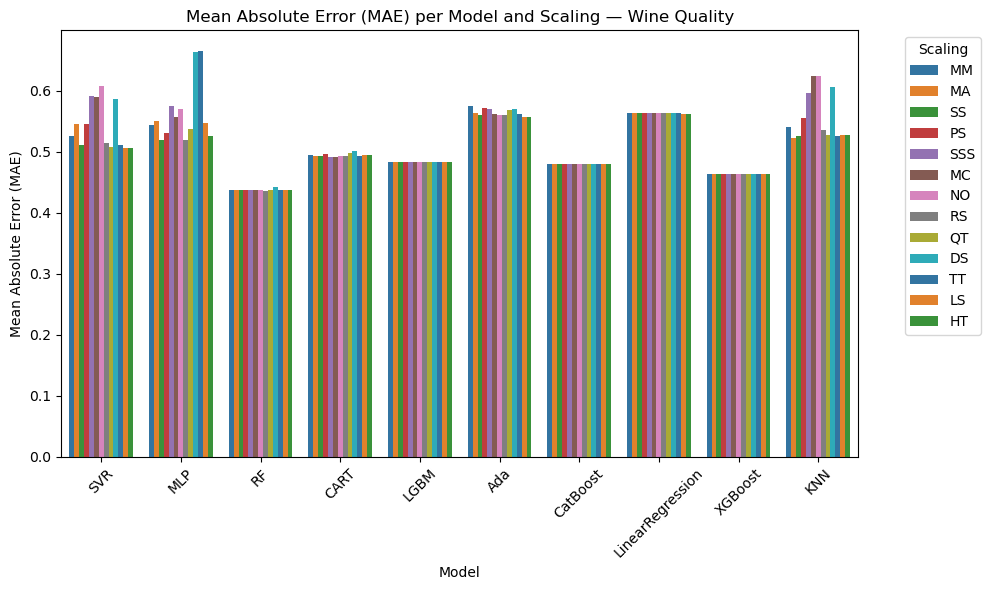

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Create output directory
output_dir = "results/tables_mae_regression"
os.makedirs(output_dir, exist_ok=True)
df_class_analysis = df_results['dataset_name'].loc[df_results['mae'].notna()].unique()

def bold_max_mask(df):
    return df.eq(df.max(axis=1), axis=0)

for dataset in df_class_analysis:
    df_filtered_class = df_results[df_results['dataset_name'] == dataset]
    heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['mae'].mean().unstack()
    heat_df = heat_df.round(4)

    bold_mask = bold_max_mask(heat_df)

    fig, ax = plt.subplots(figsize=(12, 0.5 * len(heat_df) + 2))
    ax.axis('off')
    # ax.set_title(
    #     f"Experimental Results for '{dataset}' Dataset\nMean time_train by Model and Scaling Method",
    #     fontsize=14, weight='bold'
    # )

    table = ax.table(
        cellText=heat_df.values,
        rowLabels=heat_df.index,
        colLabels=heat_df.columns,
        loc='center',
        cellLoc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    # Bold max values
    for i, row in enumerate(bold_mask.values):
        for j, is_bold in enumerate(row):
            if is_bold:
                cell = table[(i + 1, j)]
                cell.set_fontsize(10)
                cell.set_text_props(weight='bold')

    # Save one PDF per dataset
    plt.savefig(f"{output_dir}/{dataset}_table_mae.pdf", bbox_inches='tight')
    plt.close(fig)

# Create output directory
os.makedirs(output_dir, exist_ok=True)

# List of datasets to process
datasets = df_results['dataset_name'].loc[df_results['mae'].notna()].unique()

for dataset in datasets:
    df_filtered = df_results[df_results['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_filtered,
        x='model',
        y='mae',
        hue='scaling_abbrev',
        palette='tab10'
    )
    plt.title(f"Mean Absolute Error (MAE) per Model and Scaling — {nice_title}")
    plt.ylim()
    plt.xticks(rotation=45)
    plt.ylabel("Mean Absolute Error (MAE)")
    plt.xlabel("Model")
    plt.legend(title="Scaling", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Save figure
    plt.savefig(f"{output_dir}/{dataset}_mae.pdf")
    plt.show()
    plt.close()


### Time to train and time do inference in regression results

#### Time to train

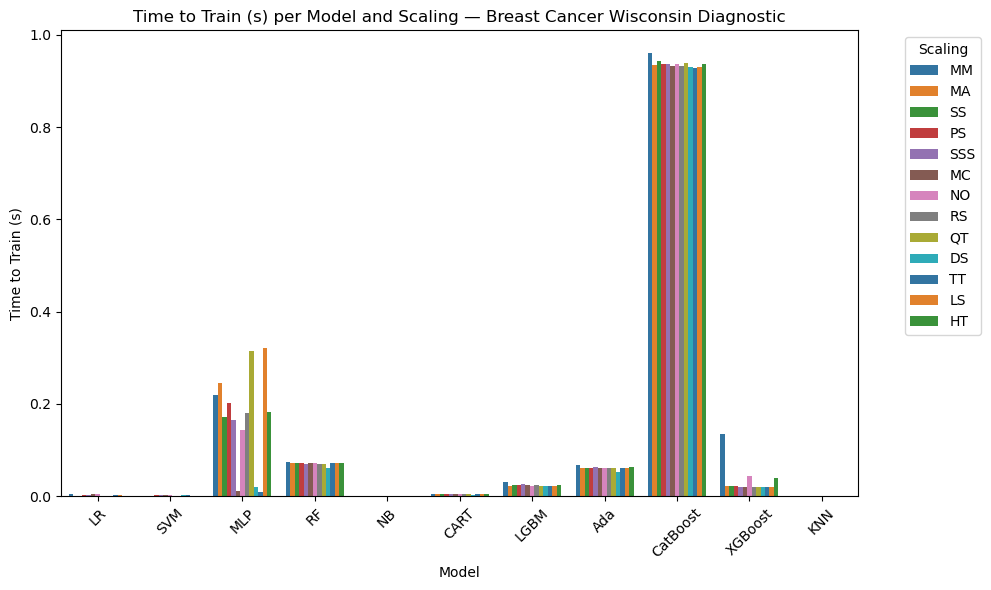

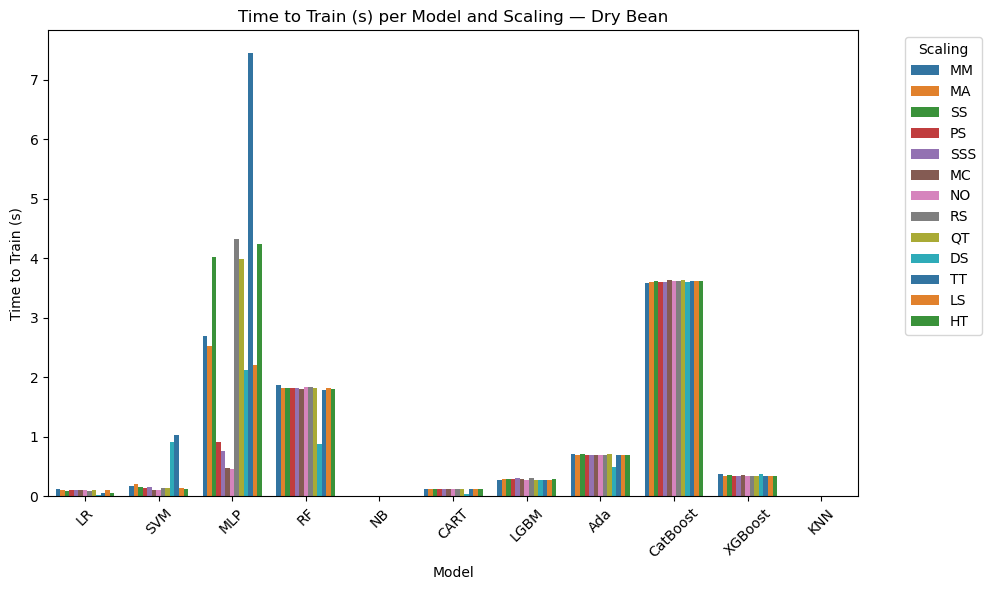

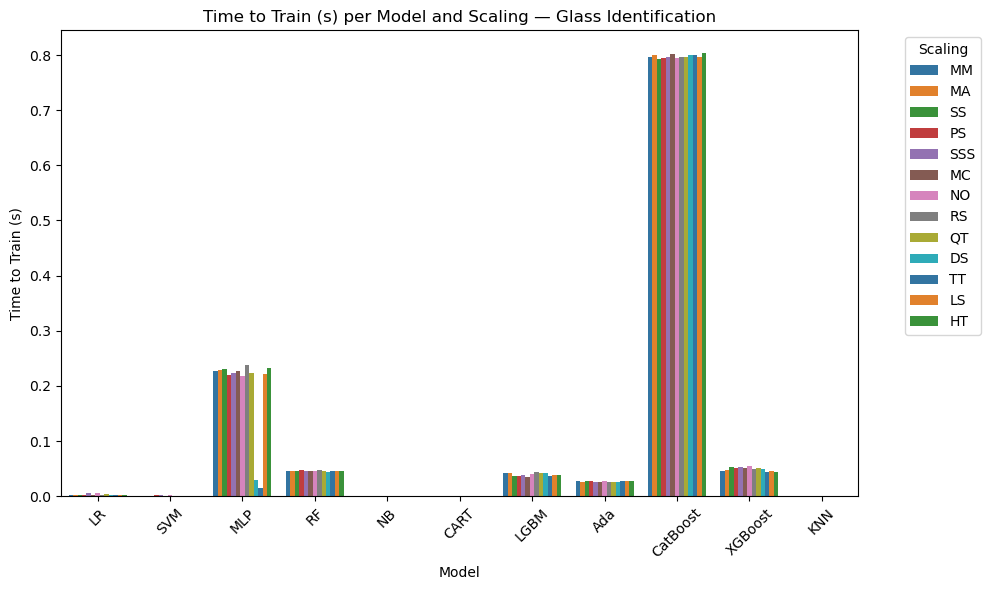

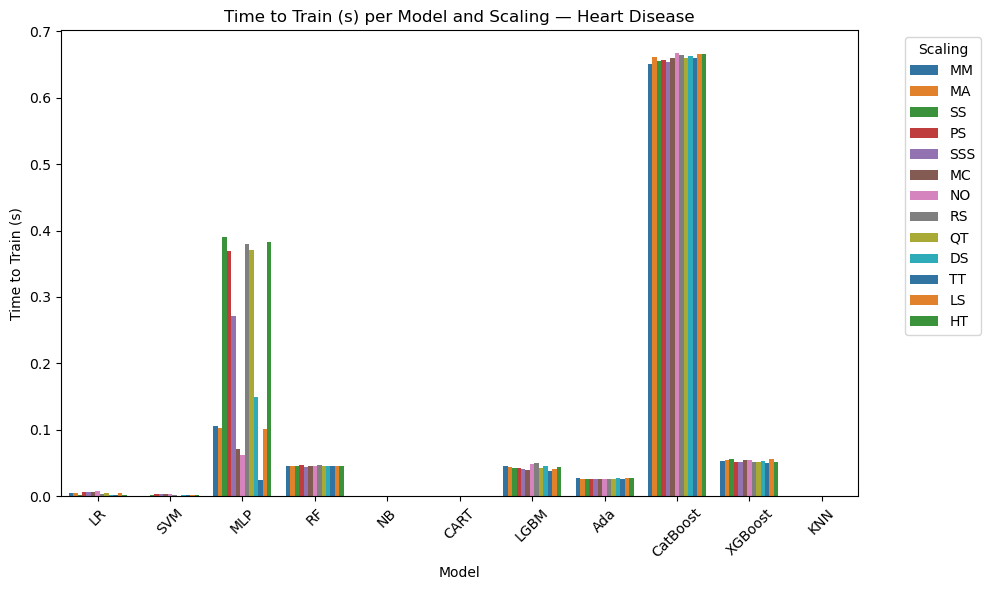

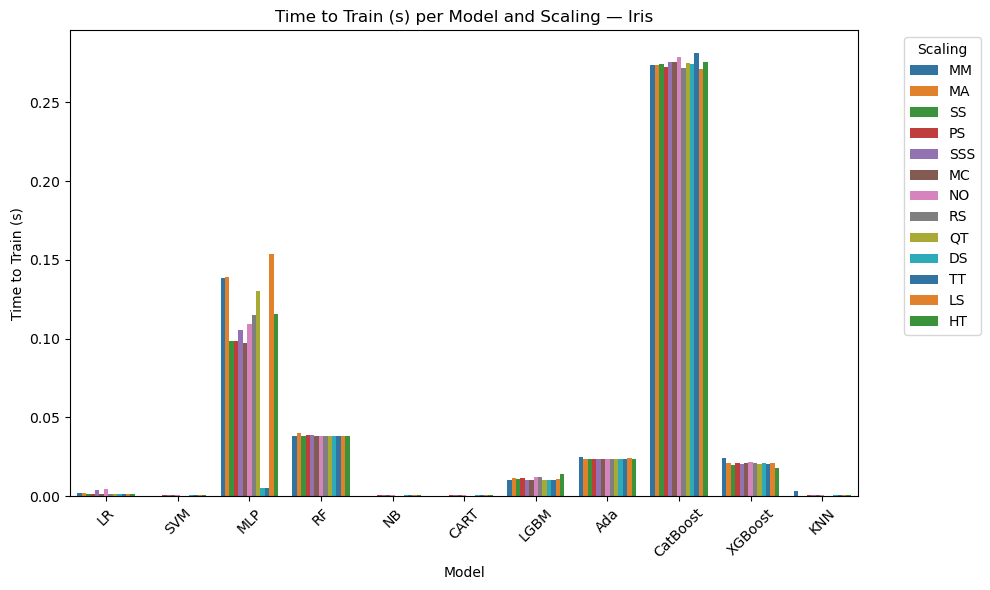

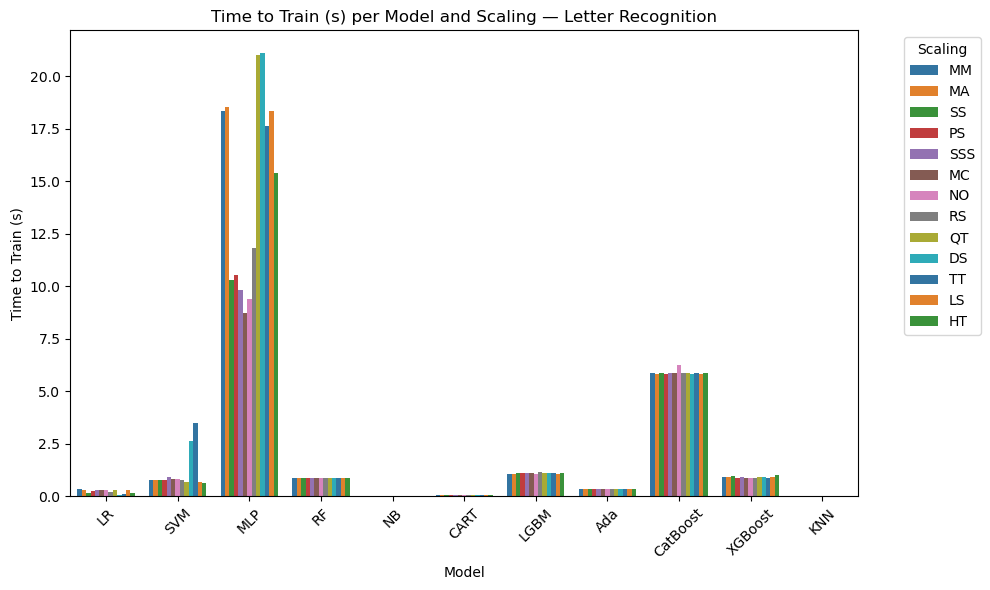

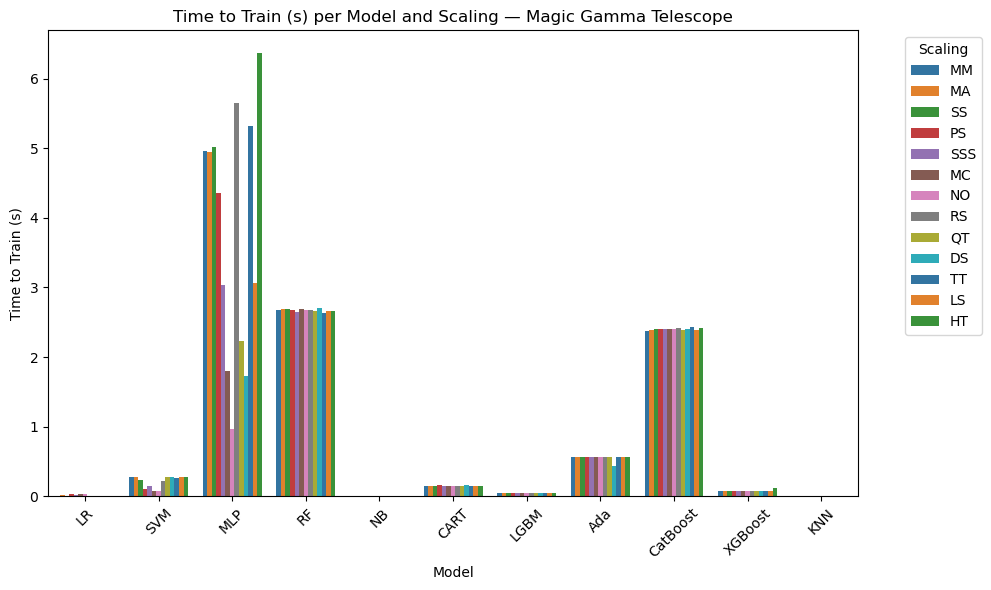

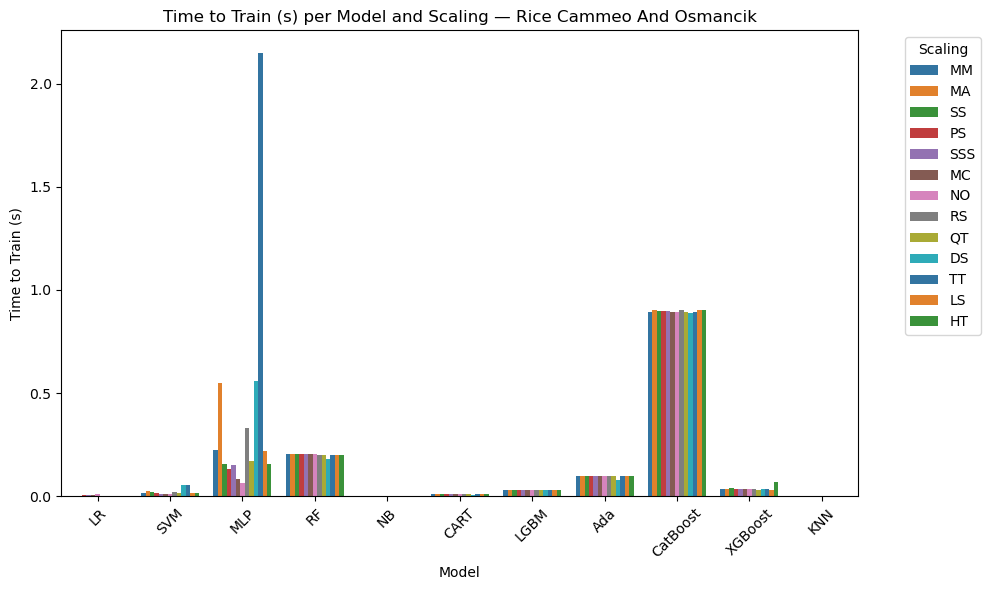

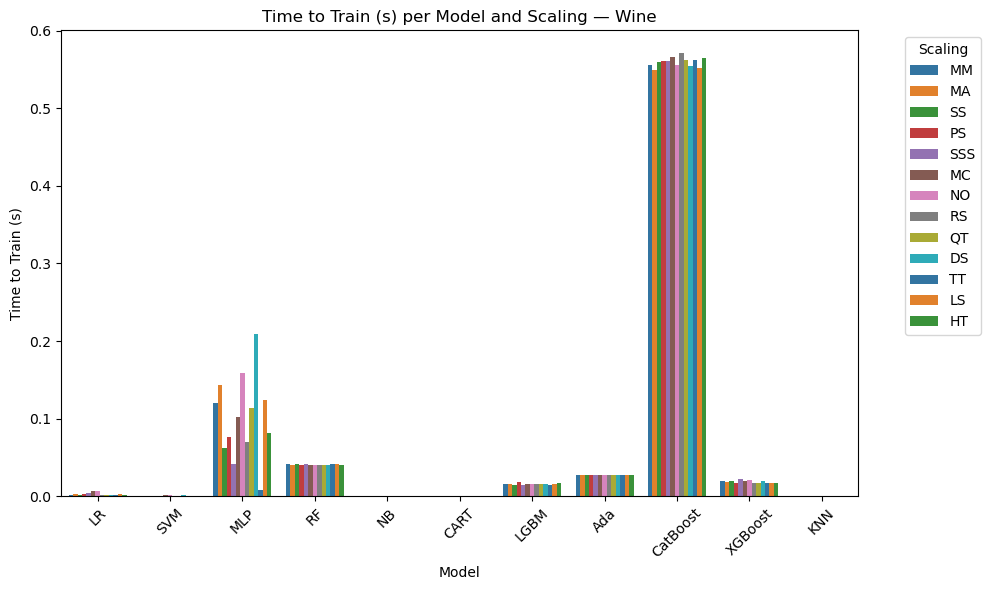

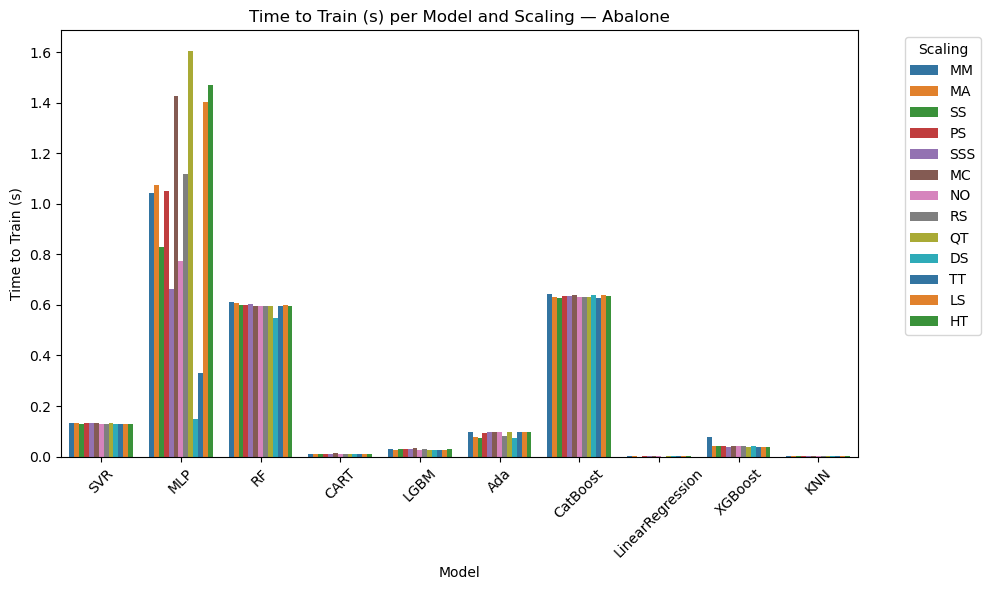

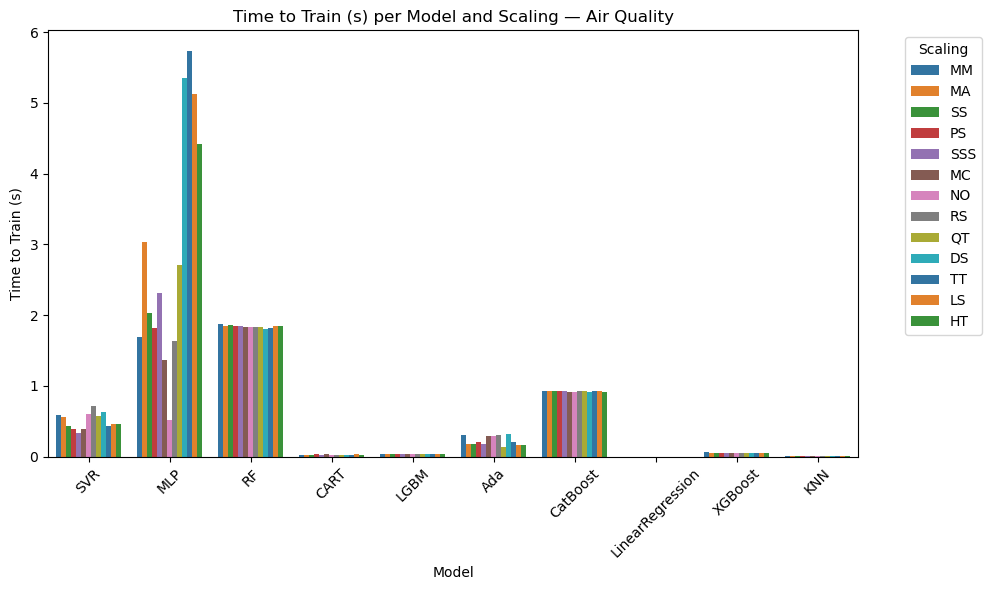

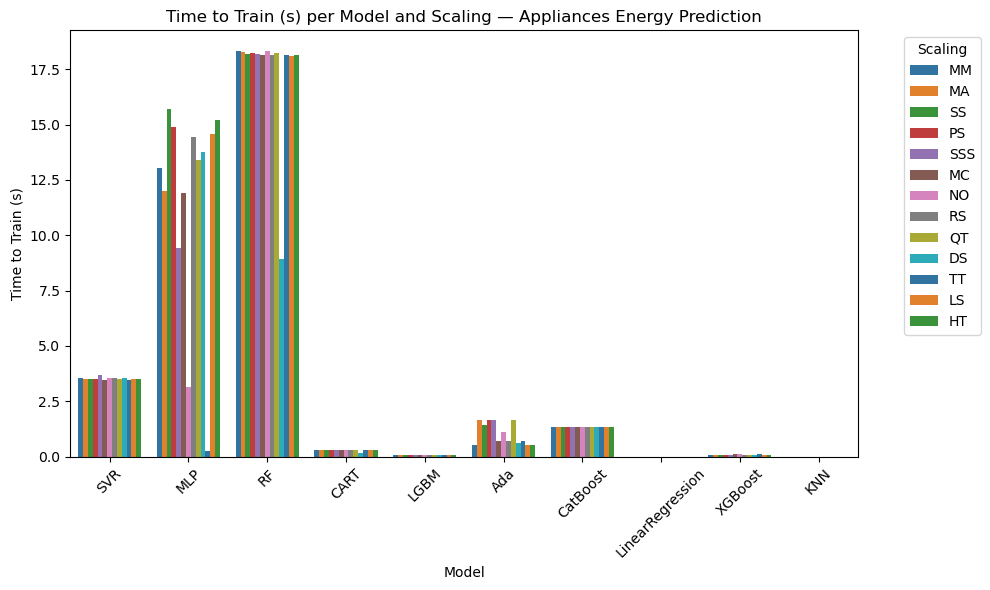

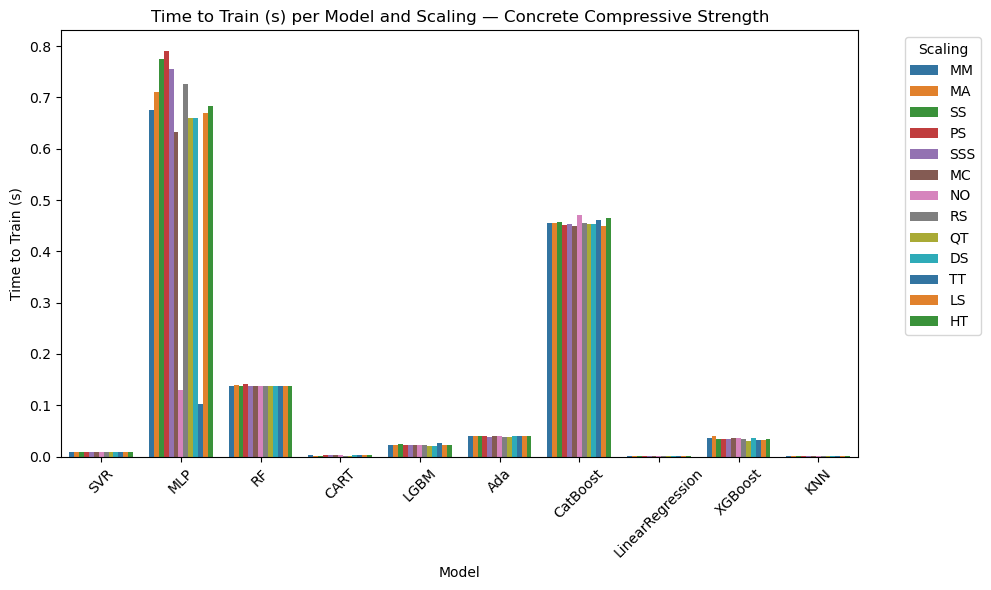

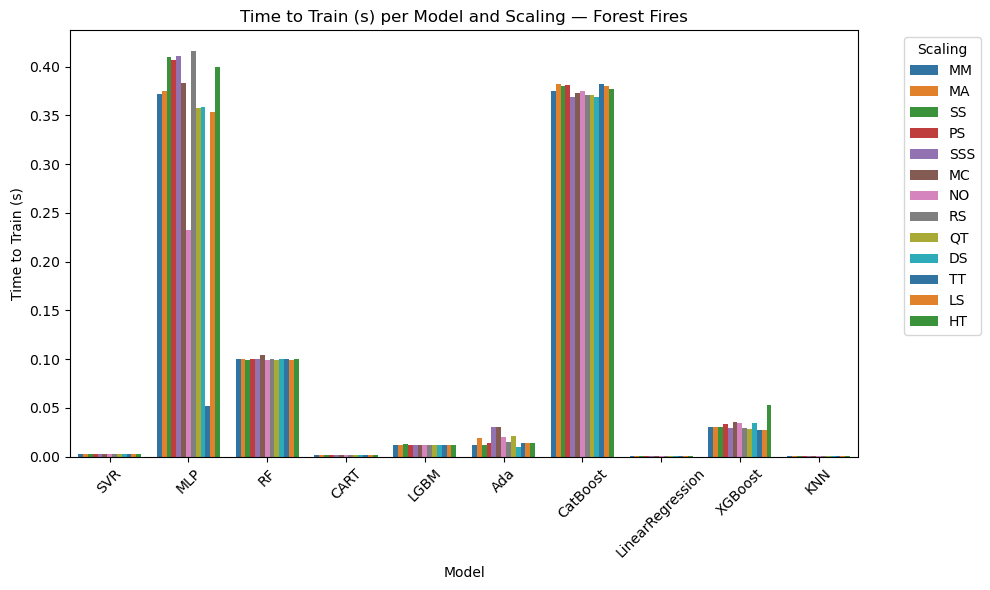

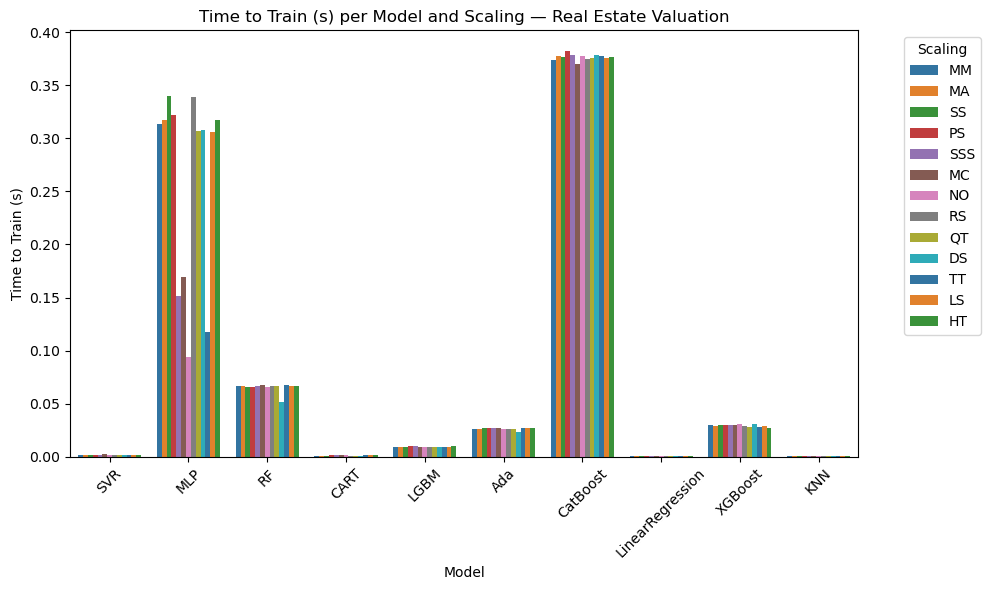

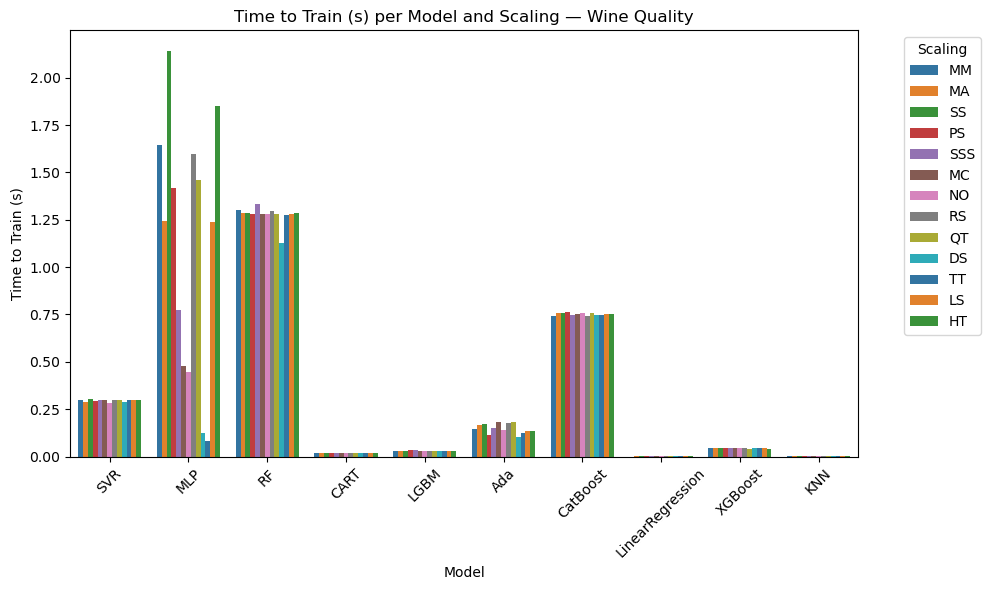

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Create output directory
output_dir = "results/tables_train_regression"
os.makedirs(output_dir, exist_ok=True)
df_class_analysis = df_results['dataset_name'].loc[df_results['mae'].notna()].unique()

def bold_max_mask(df):
    return df.eq(df.max(axis=1), axis=0)

for dataset in df_class_analysis:
    df_filtered_class = df_results[df_results['dataset_name'] == dataset]
    heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['time_train'].mean().unstack()
    heat_df = heat_df.round(4)

    bold_mask = bold_max_mask(heat_df)

    fig, ax = plt.subplots(figsize=(12, 0.5 * len(heat_df) + 2))
    ax.axis('off')
    # ax.set_title(
    #     f"Experimental Results for '{dataset}' Dataset\nMean time_train by Model and Scaling Method",
    #     fontsize=14, weight='bold'
    # )

    table = ax.table(
        cellText=heat_df.values,
        rowLabels=heat_df.index,
        colLabels=heat_df.columns,
        loc='center',
        cellLoc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    # Bold max values
    for i, row in enumerate(bold_mask.values):
        for j, is_bold in enumerate(row):
            if is_bold:
                cell = table[(i + 1, j)]
                cell.set_fontsize(10)
                cell.set_text_props(weight='bold')

    # Save one PDF per dataset
    plt.savefig(f"{output_dir}/{dataset}_table_time_train.pdf", bbox_inches='tight')
    plt.close(fig)

# Create output directory
os.makedirs(output_dir, exist_ok=True)

# List of datasets to process
datasets = df_results['dataset_name'].loc[df_results['time_train'].notna()].unique()

for dataset in datasets:
    df_filtered = df_results[df_results['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_filtered,
        x='model',
        y='time_train',
        hue='scaling_abbrev',
        palette='tab10'
    )
    plt.title(f"Time to Train (s) per Model and Scaling — {nice_title}")
    plt.ylim()
    plt.xticks(rotation=45)
    plt.ylabel("Time to Train (s)")
    plt.xlabel("Model")
    plt.legend(title="Scaling", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Save figure
    plt.savefig(f"{output_dir}/{dataset}_time_train.pdf")
    plt.show()
    plt.close()


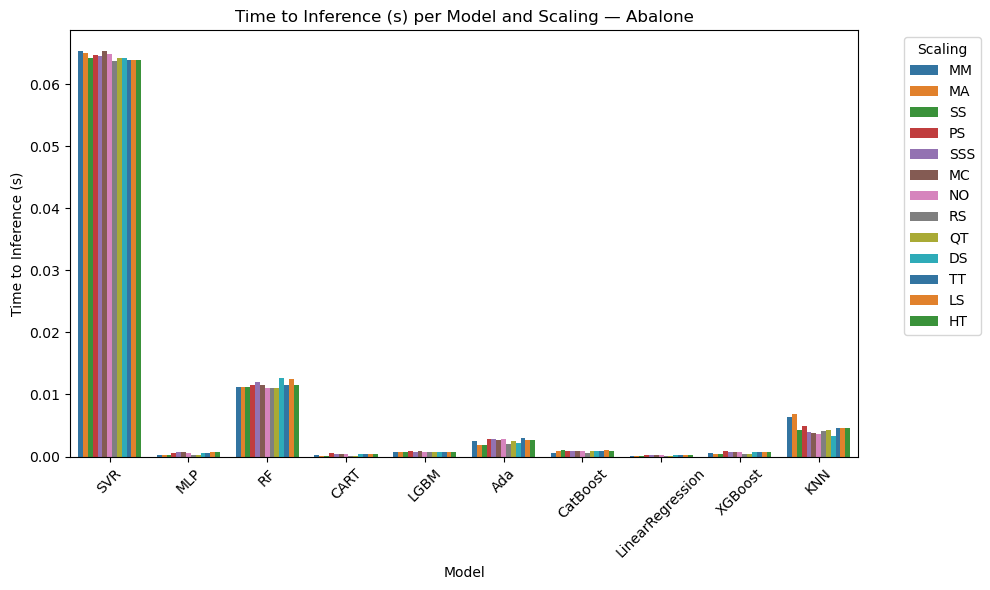

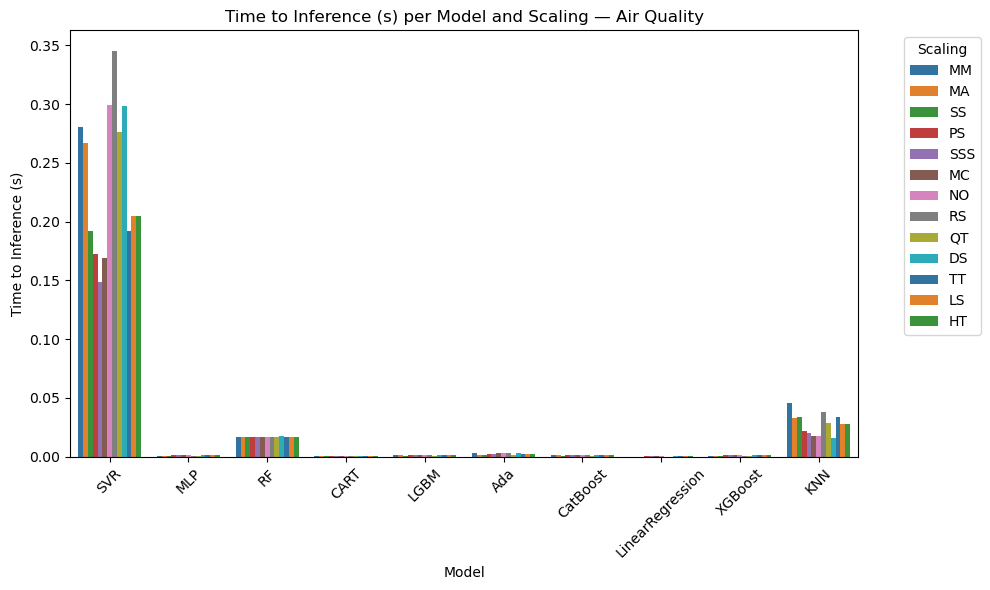

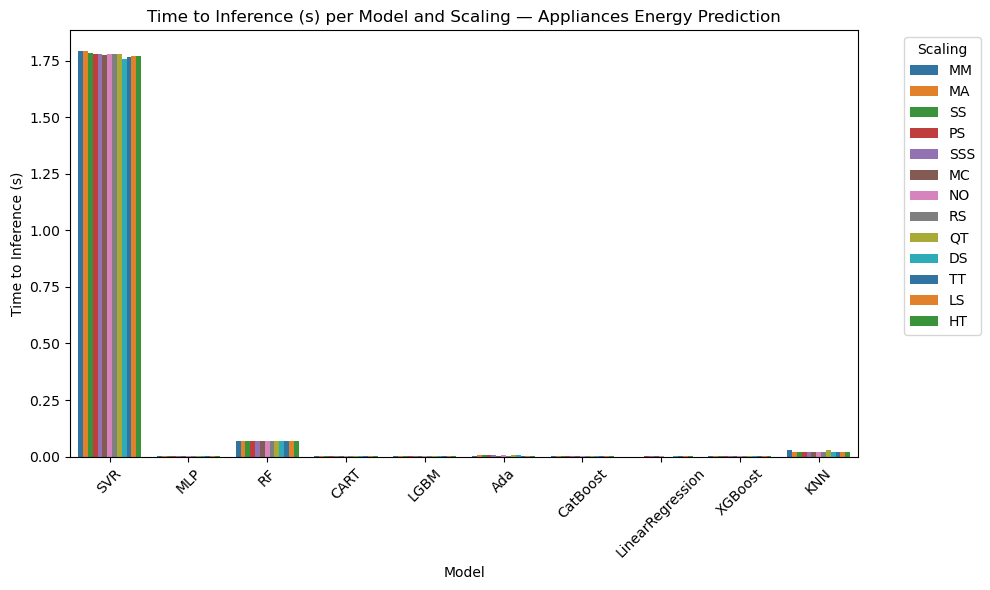

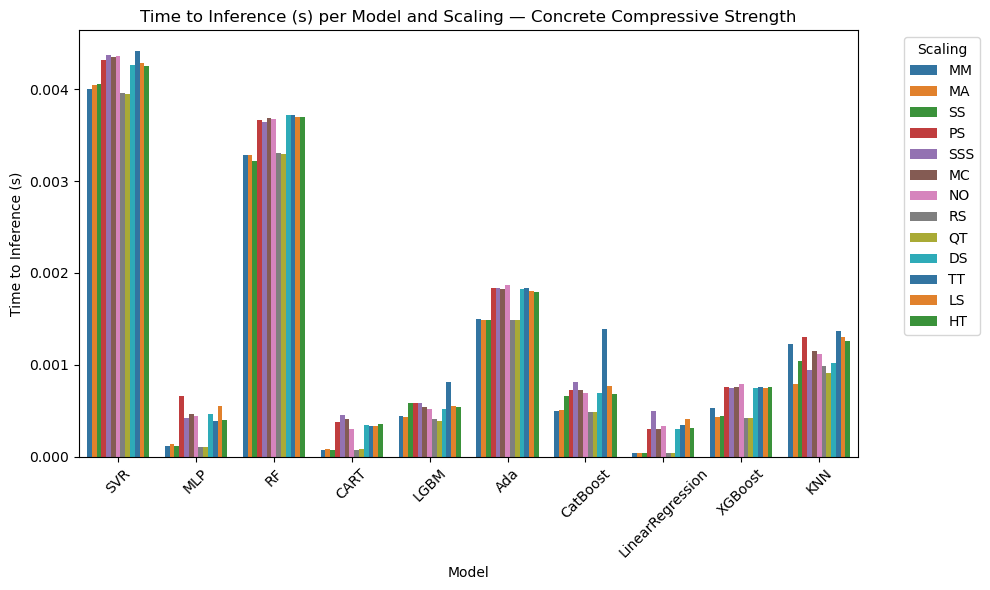

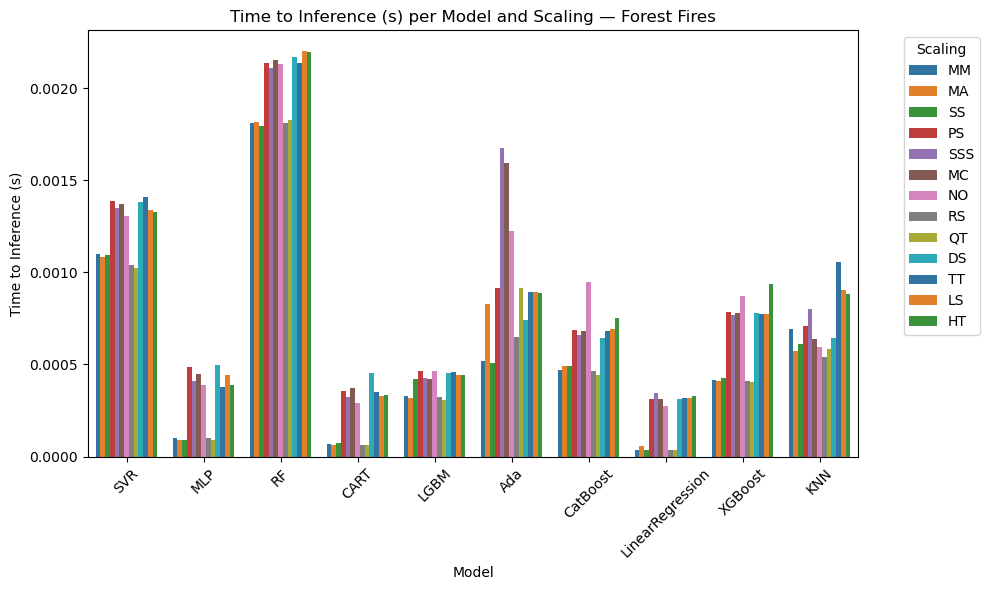

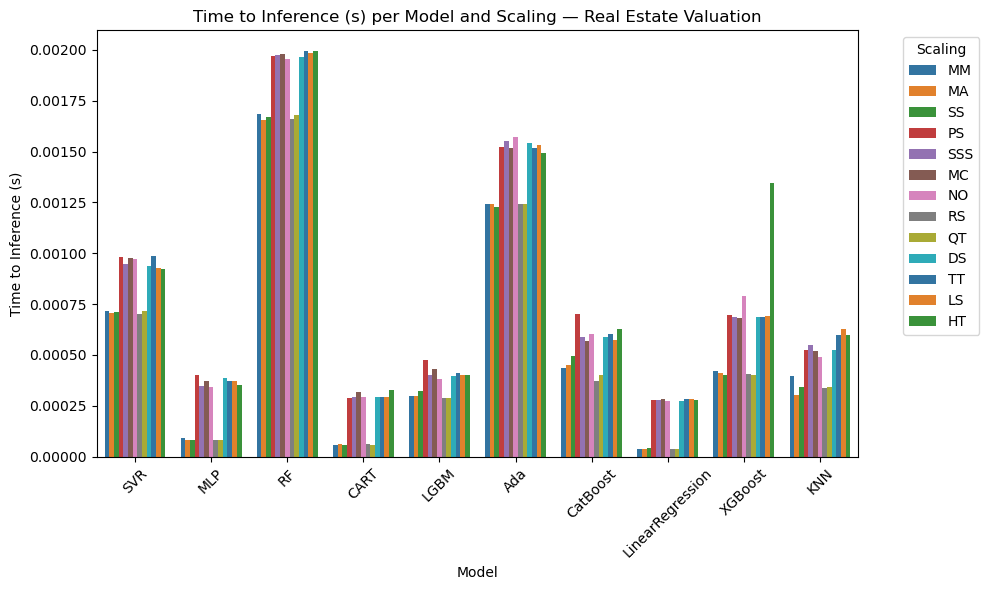

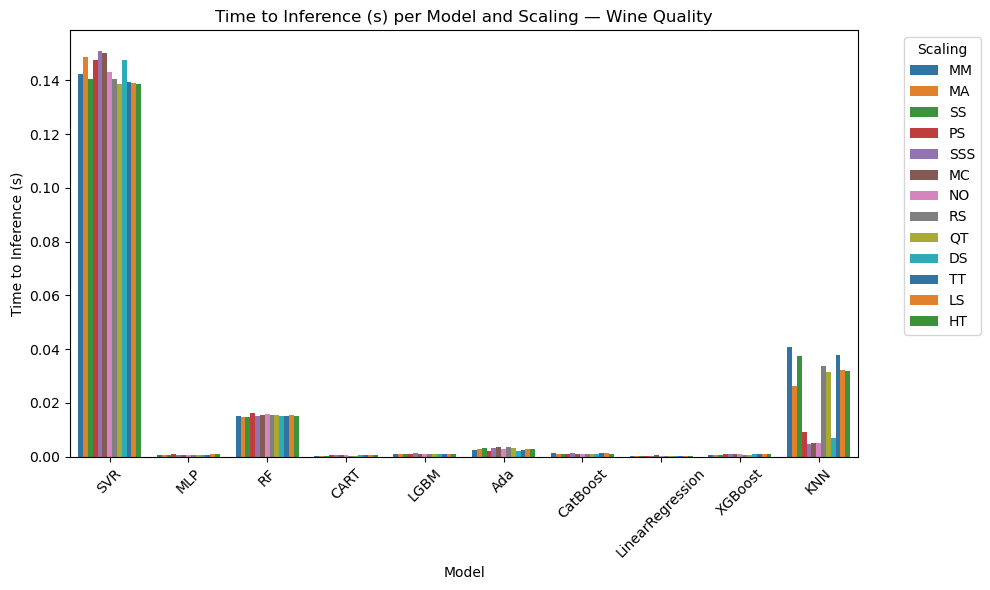

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Create output directory
output_dir = "results/tables_inference_regression"
os.makedirs(output_dir, exist_ok=True)
df_class_analysis = df_results['dataset_name'].loc[df_results['mae'].notna()].unique()

def bold_max_mask(df):
    return df.eq(df.max(axis=1), axis=0)

for dataset in df_class_analysis:
    df_filtered_class = df_results[df_results['dataset_name'] == dataset]
    heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['time_inference'].mean().unstack()
    heat_df = heat_df.round(4)

    bold_mask = bold_max_mask(heat_df)

    fig, ax = plt.subplots(figsize=(12, 0.5 * len(heat_df) + 2))
    ax.axis('off')
    # ax.set_title(
    #     f"Experimental Results for '{dataset}' Dataset\nMean time_train by Model and Scaling Method",
    #     fontsize=14, weight='bold'
    # )

    table = ax.table(
        cellText=heat_df.values,
        rowLabels=heat_df.index,
        colLabels=heat_df.columns,
        loc='center',
        cellLoc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    # Bold max values
    for i, row in enumerate(bold_mask.values):
        for j, is_bold in enumerate(row):
            if is_bold:
                cell = table[(i + 1, j)]
                cell.set_fontsize(10)
                cell.set_text_props(weight='bold')

    # Save one PDF per dataset
    plt.savefig(f"{output_dir}/{dataset}_table_time_inference.pdf", bbox_inches='tight')
    plt.close(fig)

# Create output directory
os.makedirs(output_dir, exist_ok=True)

# List of datasets to process
datasets = df_results['dataset_name'].loc[df_results['mae'].notna()].unique()

for dataset in datasets:
    df_filtered = df_results[df_results['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_filtered,
        x='model',
        y='time_inference',
        hue='scaling_abbrev',
        palette='tab10'
    )
    plt.title(f"Time to Inference (s) per Model and Scaling — {nice_title}")
    plt.ylim()
    plt.xticks(rotation=45)
    plt.ylabel("Time to Inference (s)")
    plt.xlabel("Model")
    plt.legend(title="Scaling", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Save figure
    plt.savefig(f"{output_dir}/{dataset}_time_inference.pdf")
    plt.show()
    plt.close()


#### Memory Usage in regression

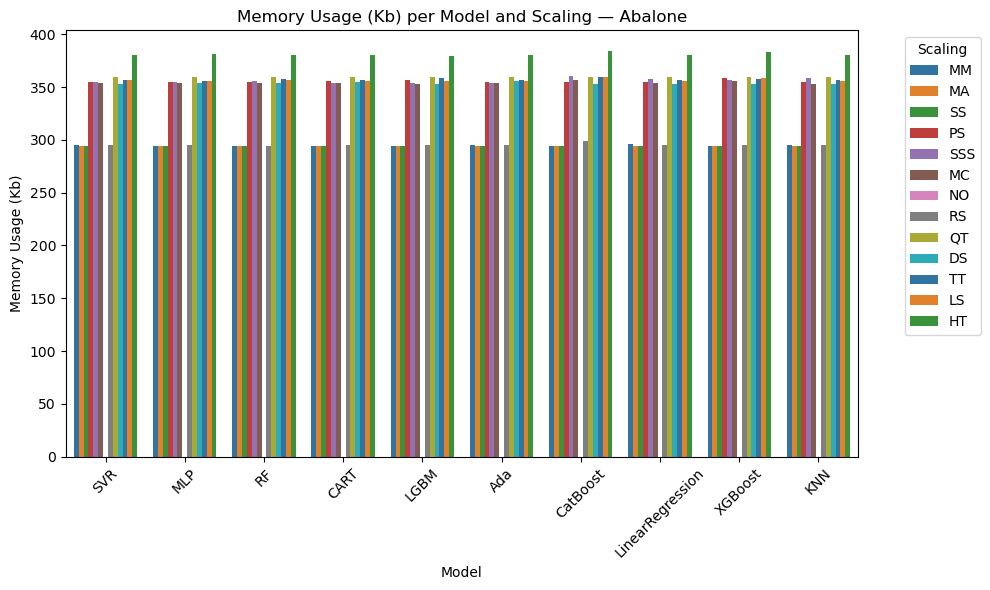

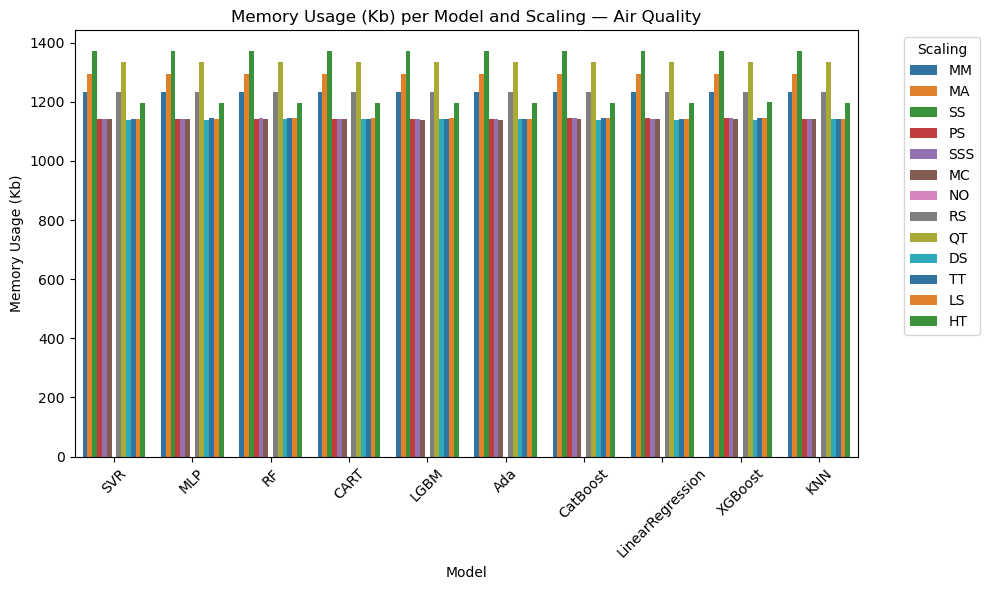

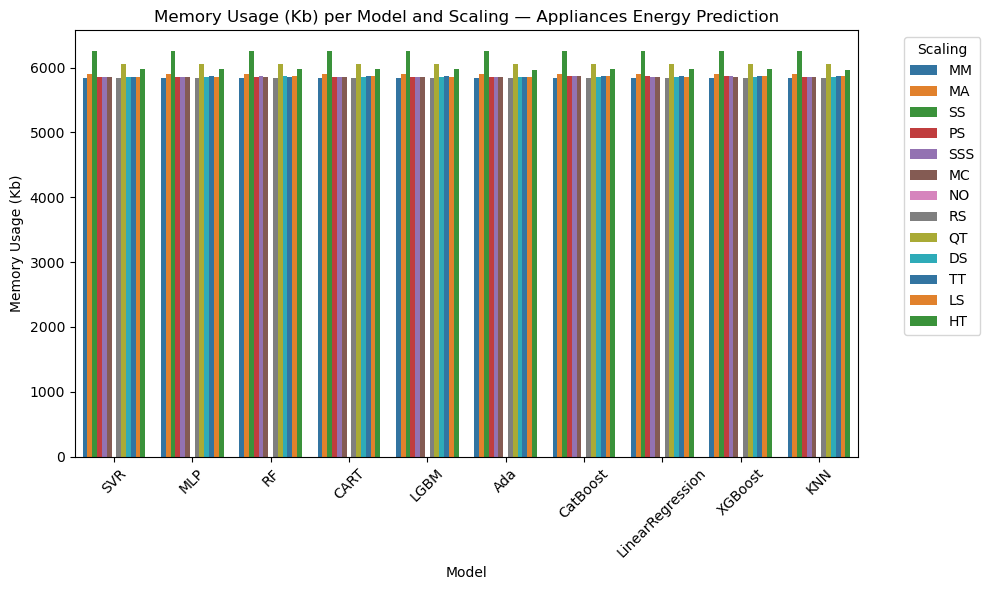

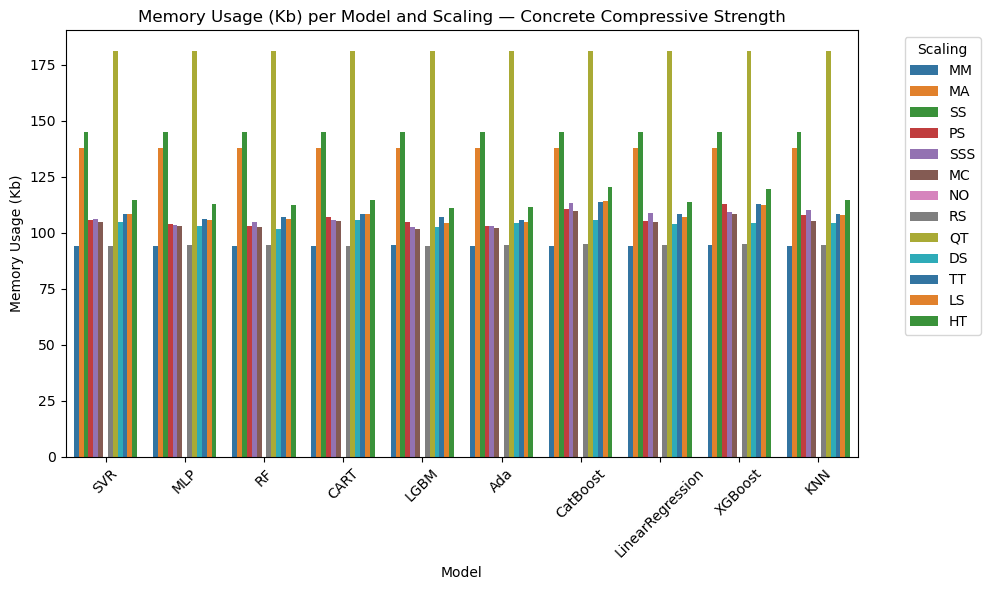

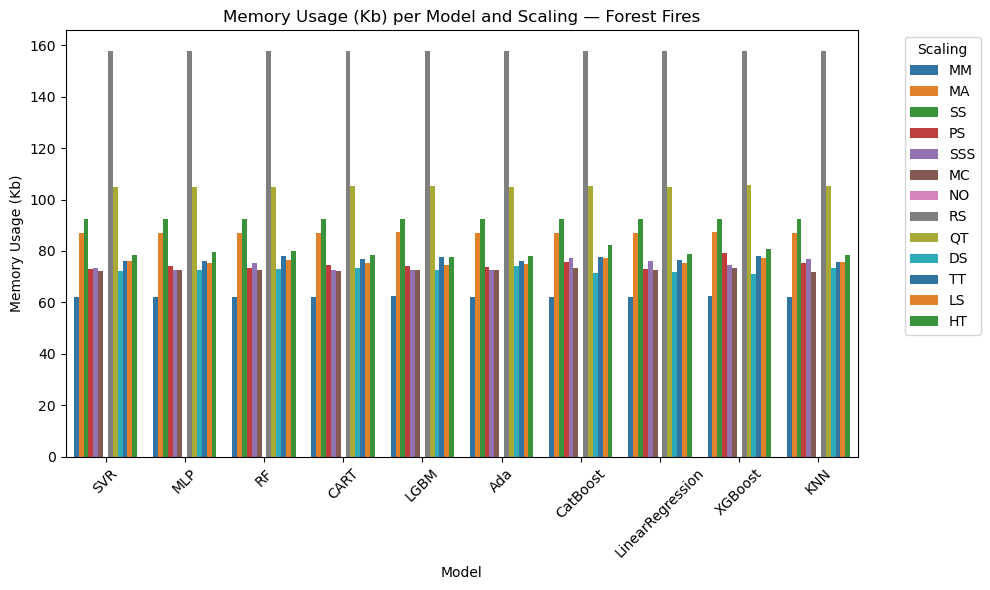

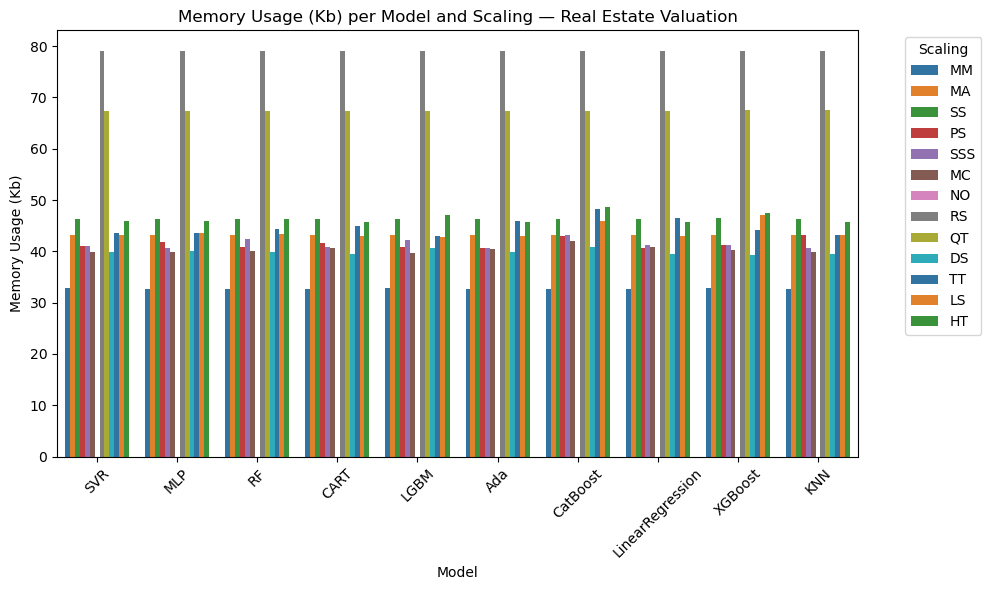

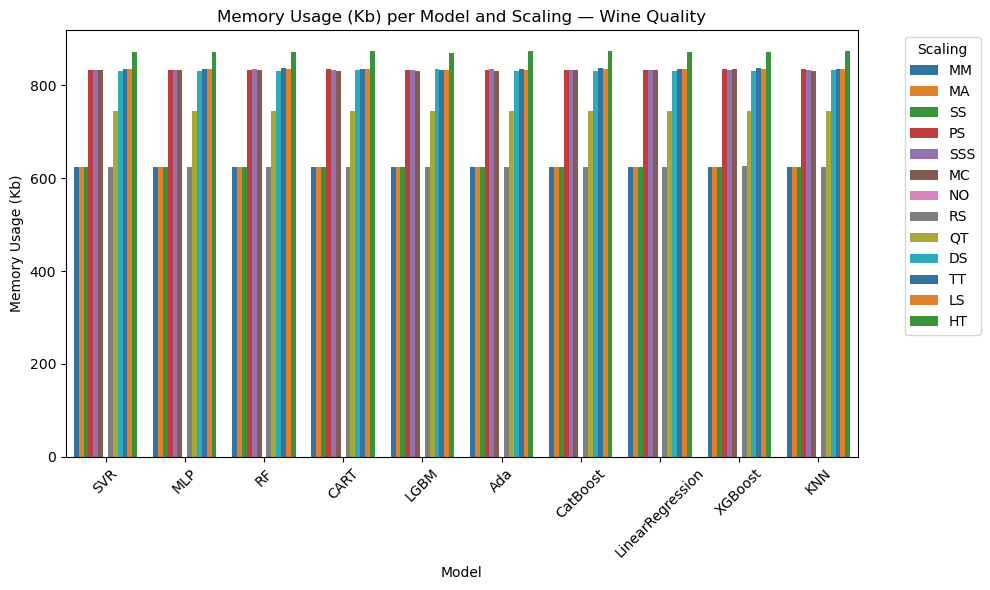

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Create output directory
output_dir = "results/tables_inference_regression"
os.makedirs(output_dir, exist_ok=True)
df_class_analysis = df_results['dataset_name'].loc[df_results['mae'].notna()].unique()

def bold_max_mask(df):
    return df.eq(df.max(axis=1), axis=0)

for dataset in df_class_analysis:
    df_filtered_class = df_results[df_results['dataset_name'] == dataset]
    heat_df = df_filtered_class.groupby(['model', 'scaling_abbrev'])['memory_used_kb'].mean().unstack()
    heat_df = heat_df.round(4)

    bold_mask = bold_max_mask(heat_df)

    fig, ax = plt.subplots(figsize=(12, 0.5 * len(heat_df) + 2))
    ax.axis('off')
    # ax.set_title(
    #     f"Experimental Results for '{dataset}' Dataset\nMean time_train by Model and Scaling Method",
    #     fontsize=14, weight='bold'
    # )

    table = ax.table(
        cellText=heat_df.values,
        rowLabels=heat_df.index,
        colLabels=heat_df.columns,
        loc='center',
        cellLoc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    # Bold max values
    for i, row in enumerate(bold_mask.values):
        for j, is_bold in enumerate(row):
            if is_bold:
                cell = table[(i + 1, j)]
                cell.set_fontsize(10)
                cell.set_text_props(weight='bold')

    # Save one PDF per dataset
    plt.savefig(f"{output_dir}/{dataset}_table_memory.pdf", bbox_inches='tight')
    plt.close(fig)

# Create output directory
os.makedirs(output_dir, exist_ok=True)

# List of datasets to process
datasets = df_results['dataset_name'].loc[df_results['mae'].notna()].unique()

for dataset in datasets:
    df_filtered = df_results[df_results['dataset_name'] == dataset]
    nice_title = name_mapping.get(dataset, dataset)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_filtered,
        x='model',
        y='memory_used_kb',
        hue='scaling_abbrev',
        palette='tab10'
    )
    plt.title(f"Memory Usage (Kb) per Model and Scaling — {nice_title}")
    plt.ylim()
    plt.xticks(rotation=45)
    plt.ylabel("Memory Usage (Kb)")
    plt.xlabel("Model")
    plt.legend(title="Scaling", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Save figure
    plt.savefig(f"{output_dir}/{dataset}_memory.pdf")
    plt.show()
    plt.close()
